# CENSUS UNPACKED

![alt text][logo]

[logo]: https://mumbrella.com.au/wp-content/uploads/2016/02/census_logo.jpg

![alt text][logo2]

[logo2]: https://edge.alluremedia.com.au/uploads/businessinsider/2017/06/census-2016-graphic.jpg

## Why is this important?

The census is an **important collection of data** that informs many policy decisions made by the government. 

While all the information is publicly available, it is **not easy to understand**. Many outlets simplify the data into nice graphics for us but these agencies often have bias or agendas that don't make them impartial.

Through this assignment, I aim to **create a platform** that can help **'unpack'** previously unexplored **data!**


## OVERVIEW:

**The Process**

*STEP 1:* Download census data!

*STEP 2:* Extract desired data!

*STEP 3:* Unpack the Geopackage

*STEP 4:* Merge Census and Geopackage dataframes

*STEP 5:* Plot Plot Plot Away


**Results**



### STEP 1: Download census data!
    

#### How to Manaully Find the Data

Source: https://itt.abs.gov.au/itt/r.jsp?databyregion#/

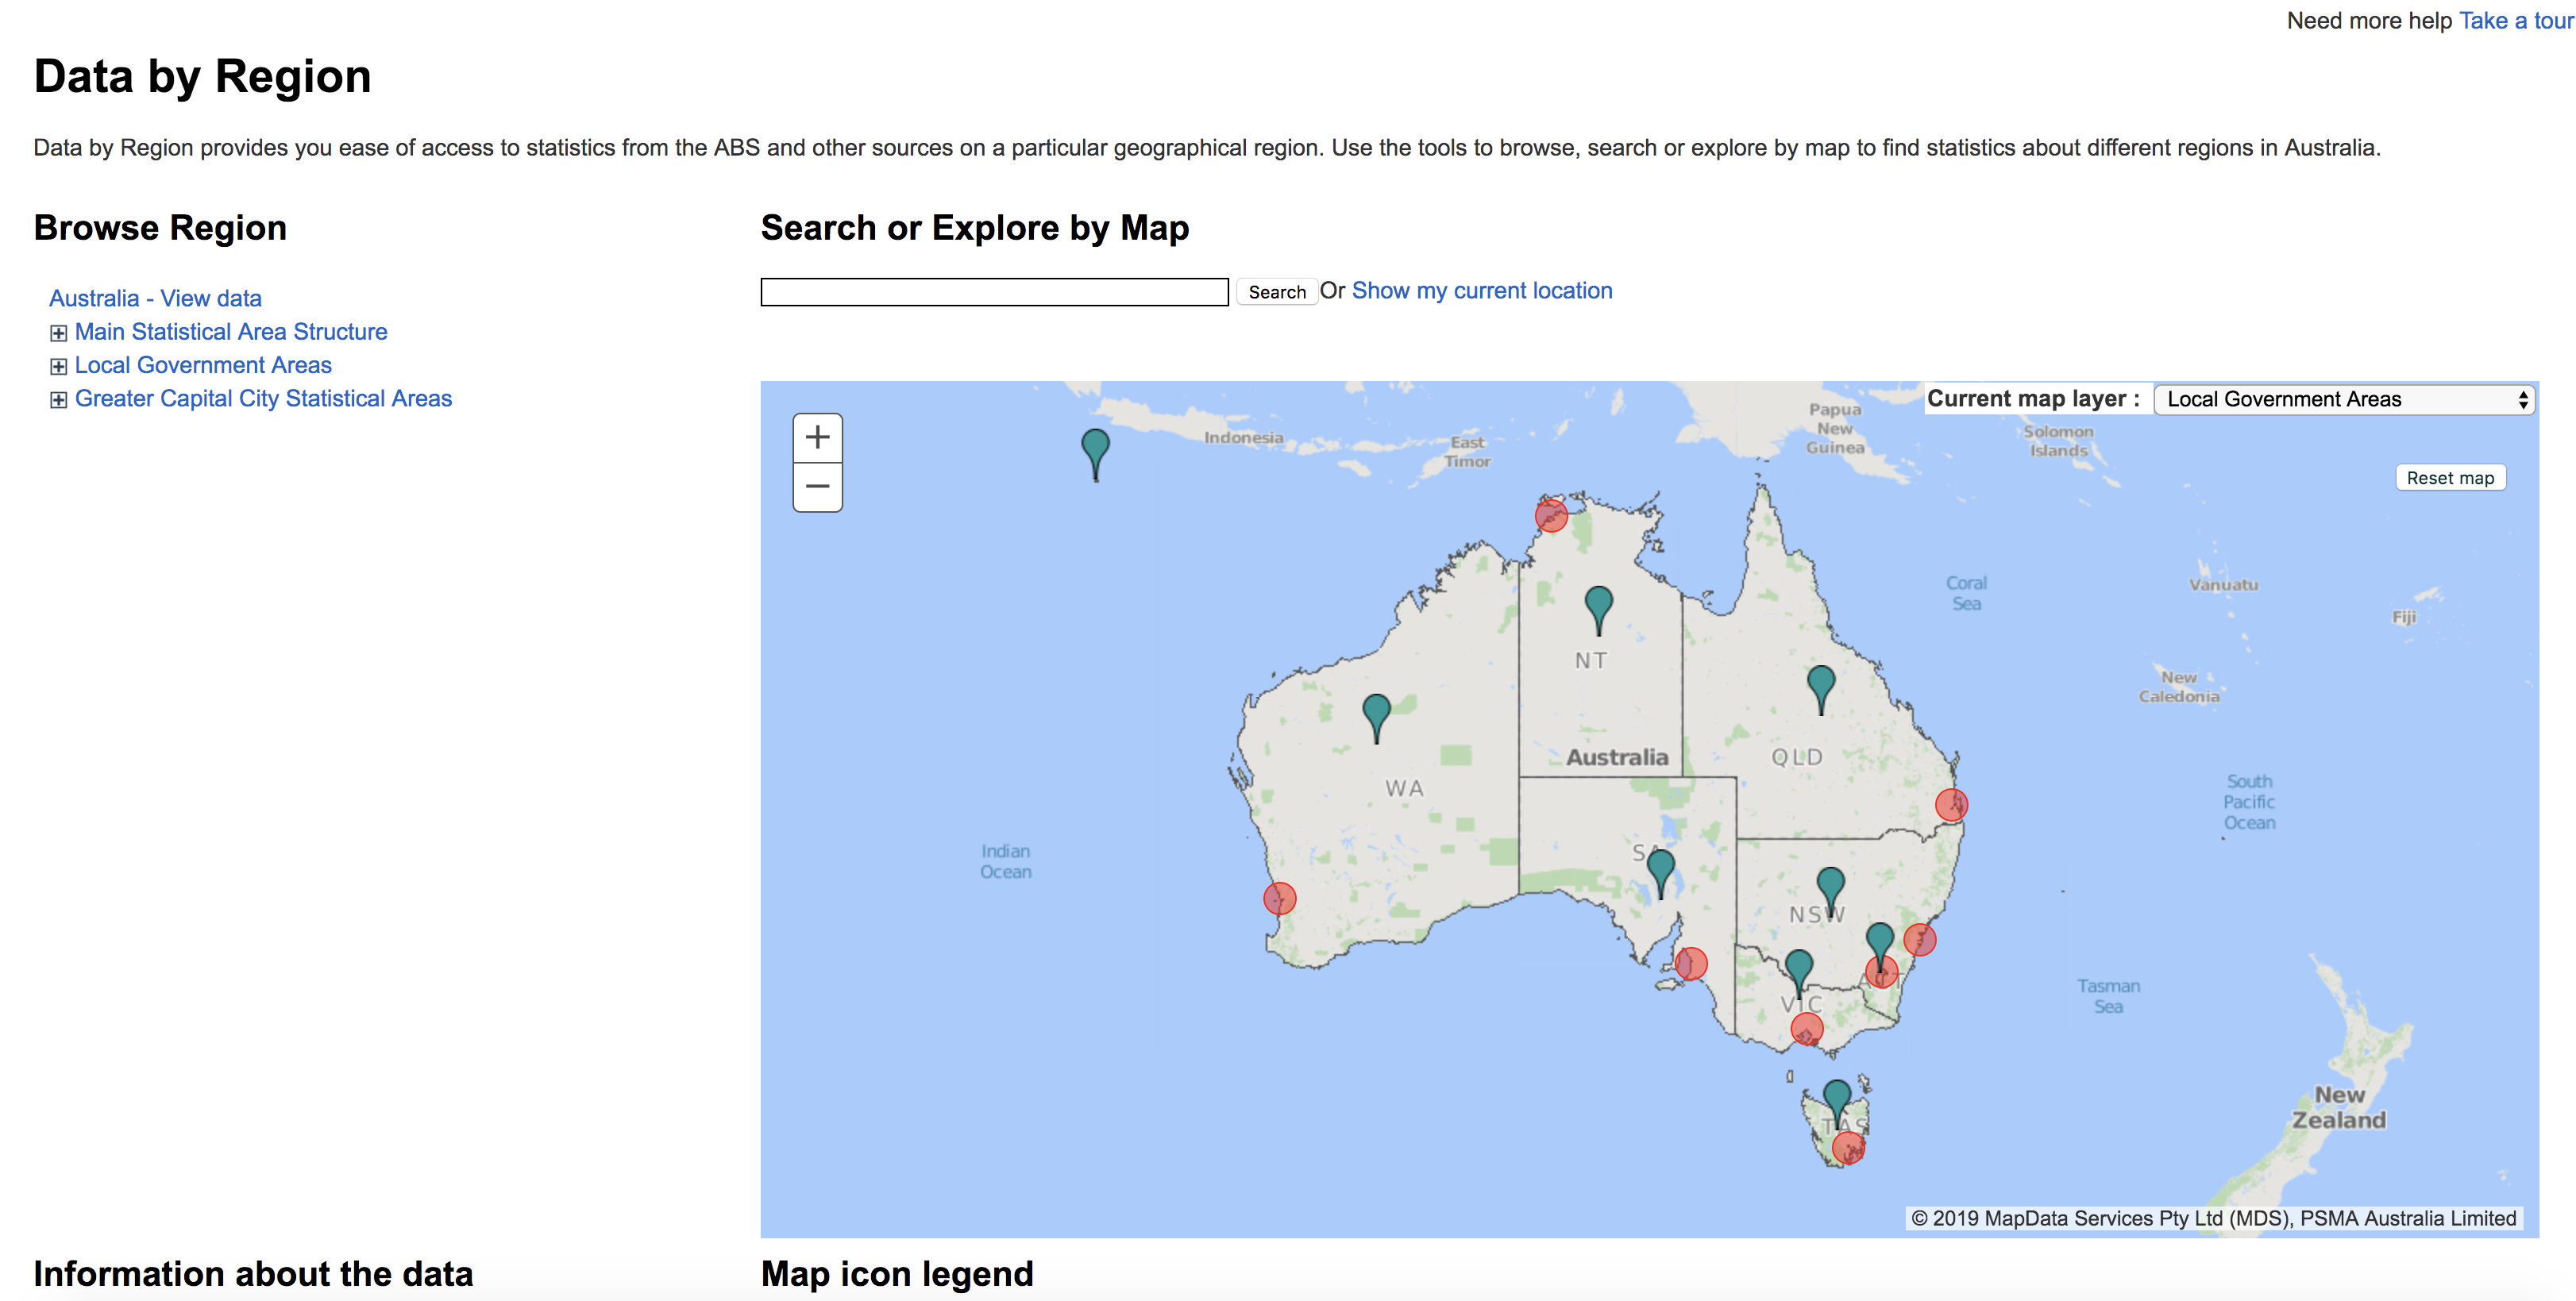



#### Path
Main Statistical Area Structure -> New South Wales -> Sydney - Eastern Suburbs -> Eastern Suburbs - South -> Kensington

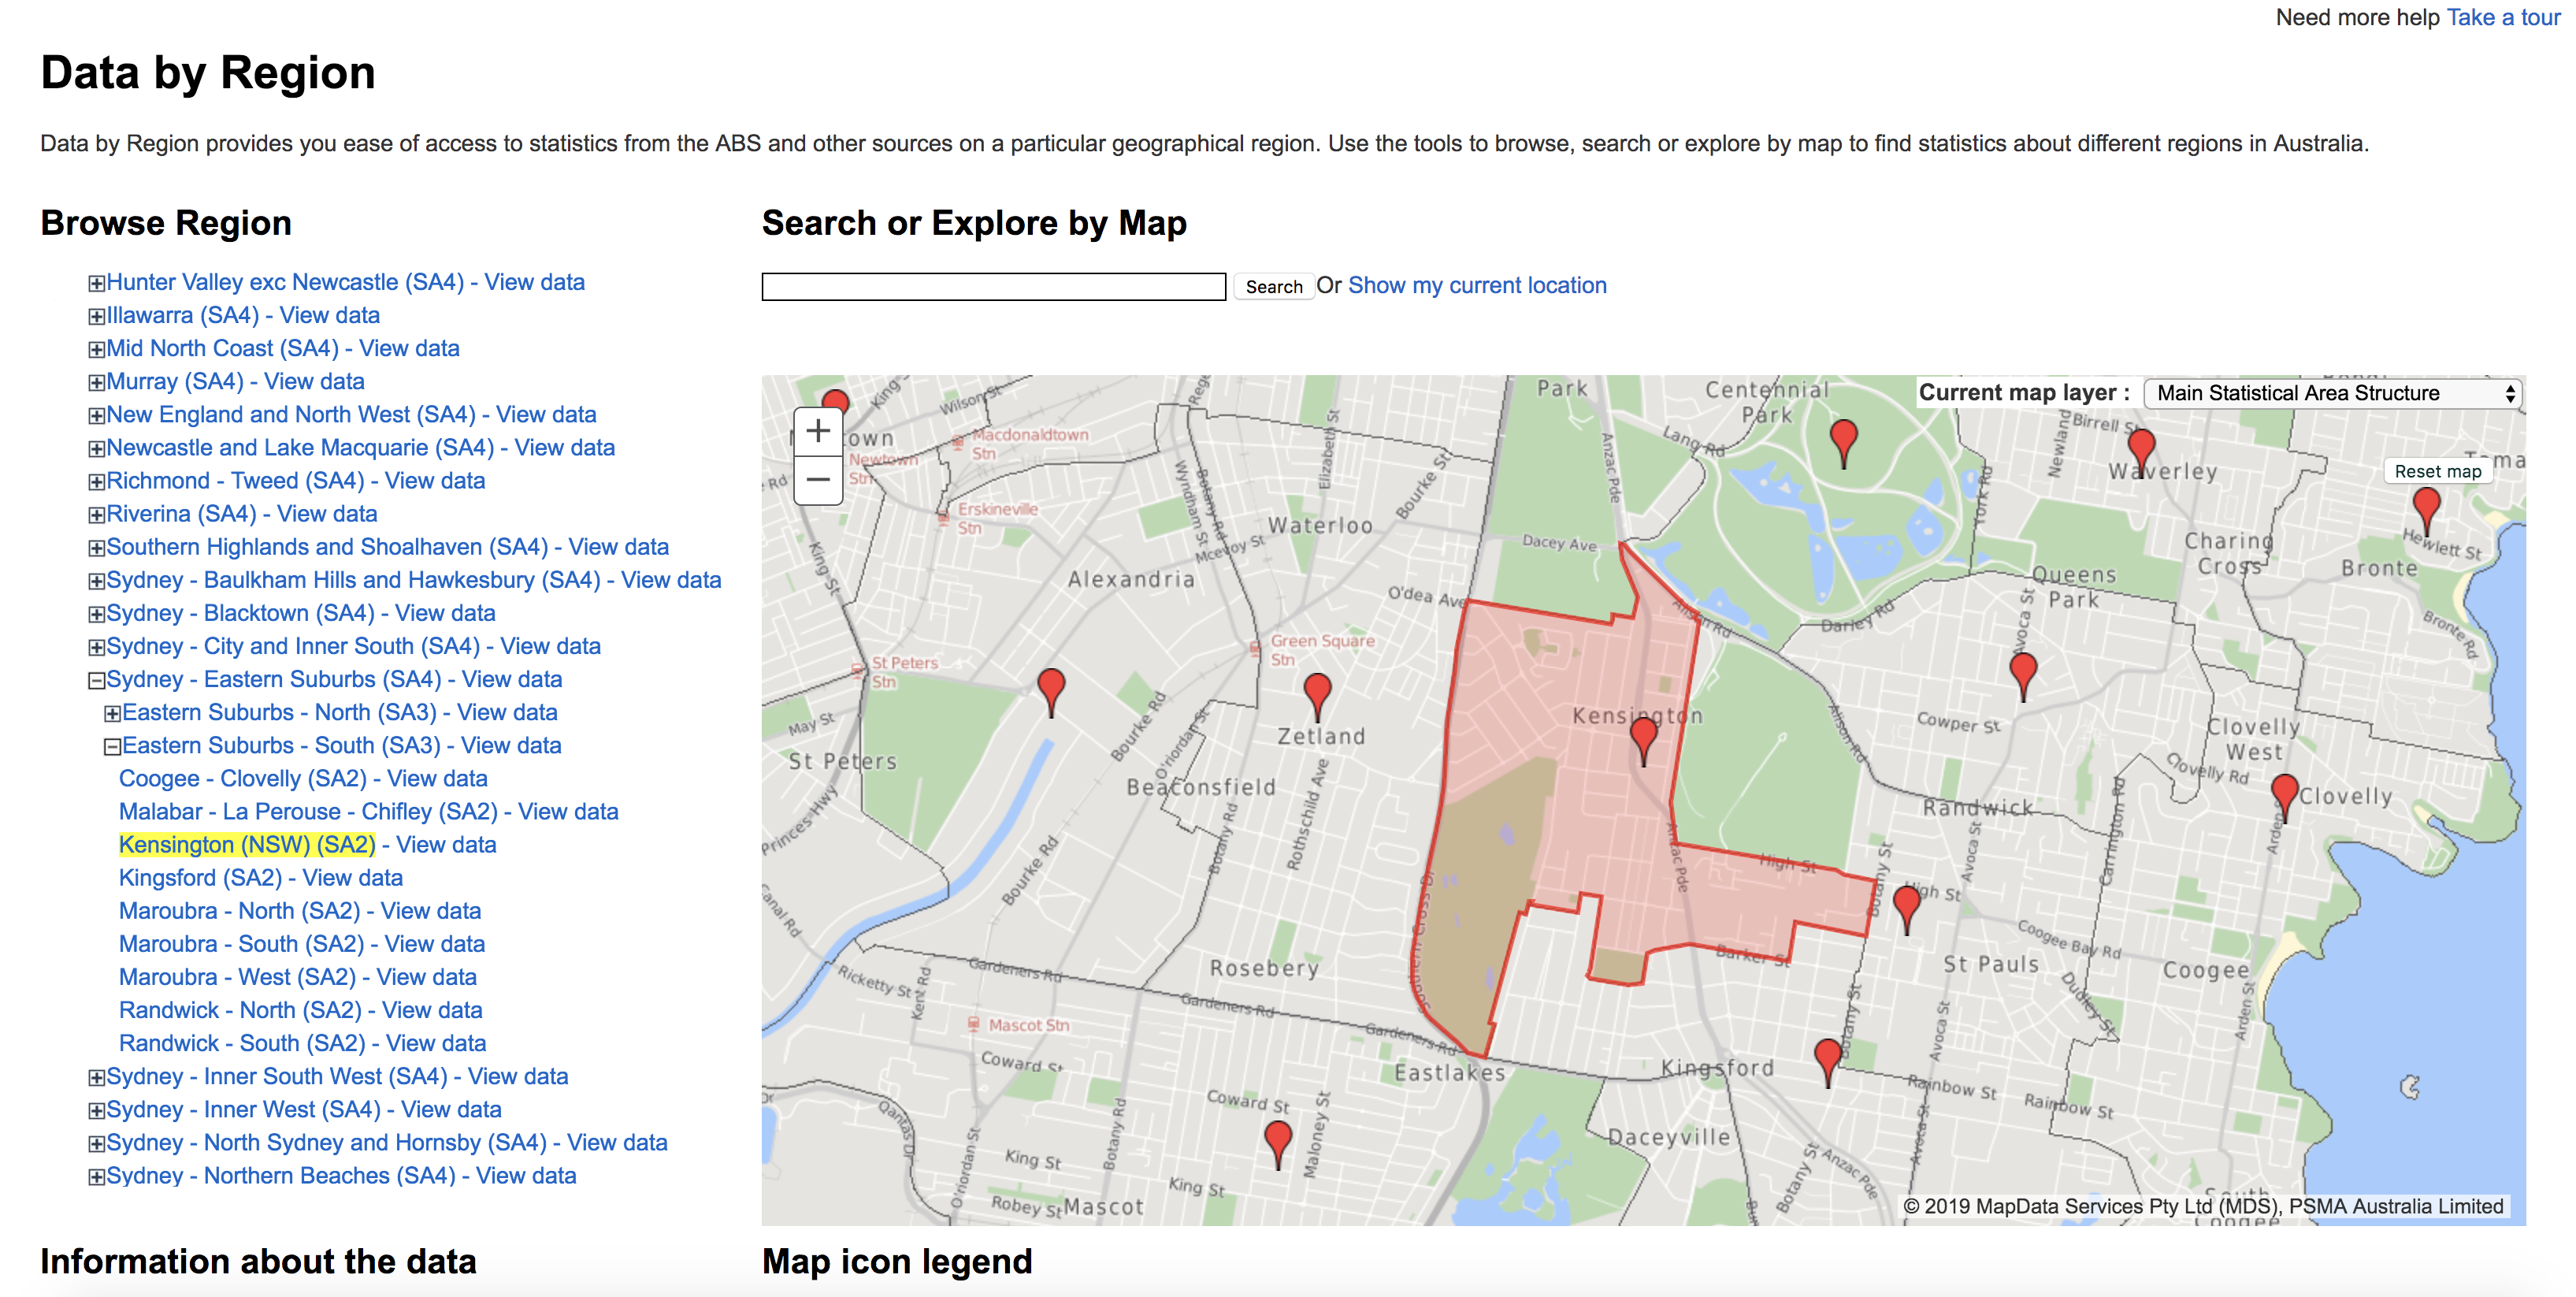

Click view data next to yellow link

#### Which opens....

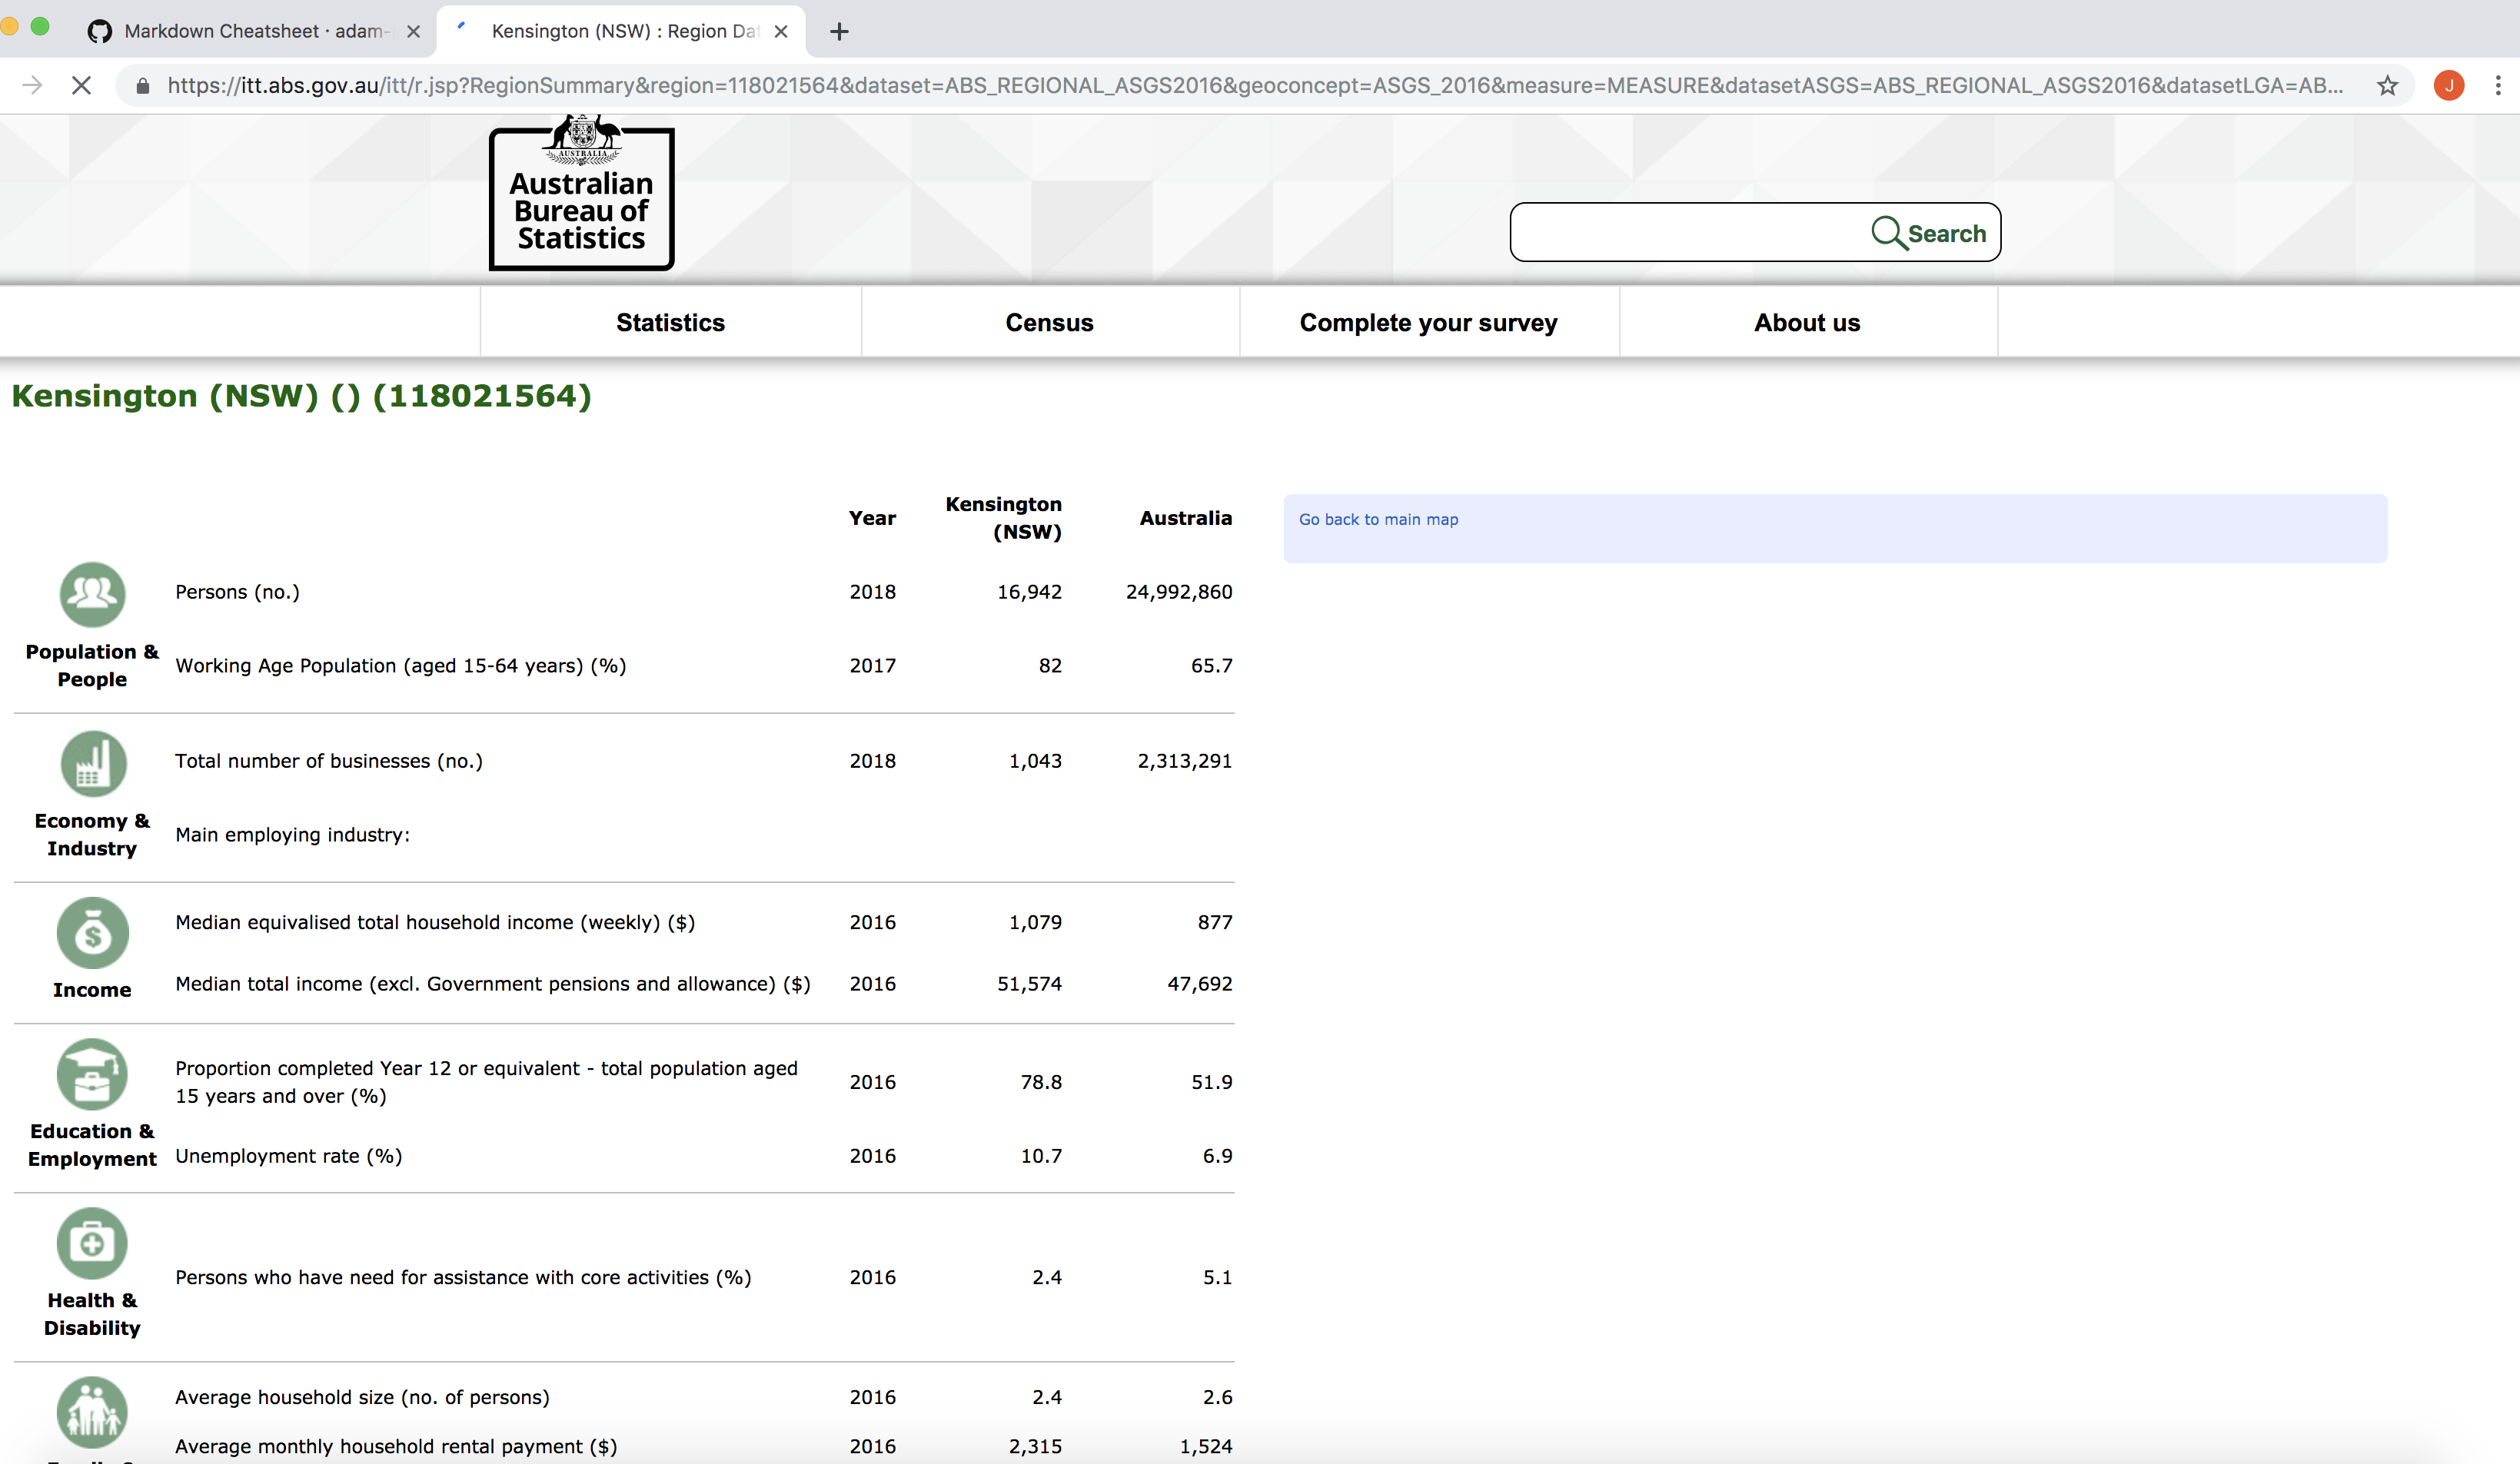

#### Scroll down and hey presto!

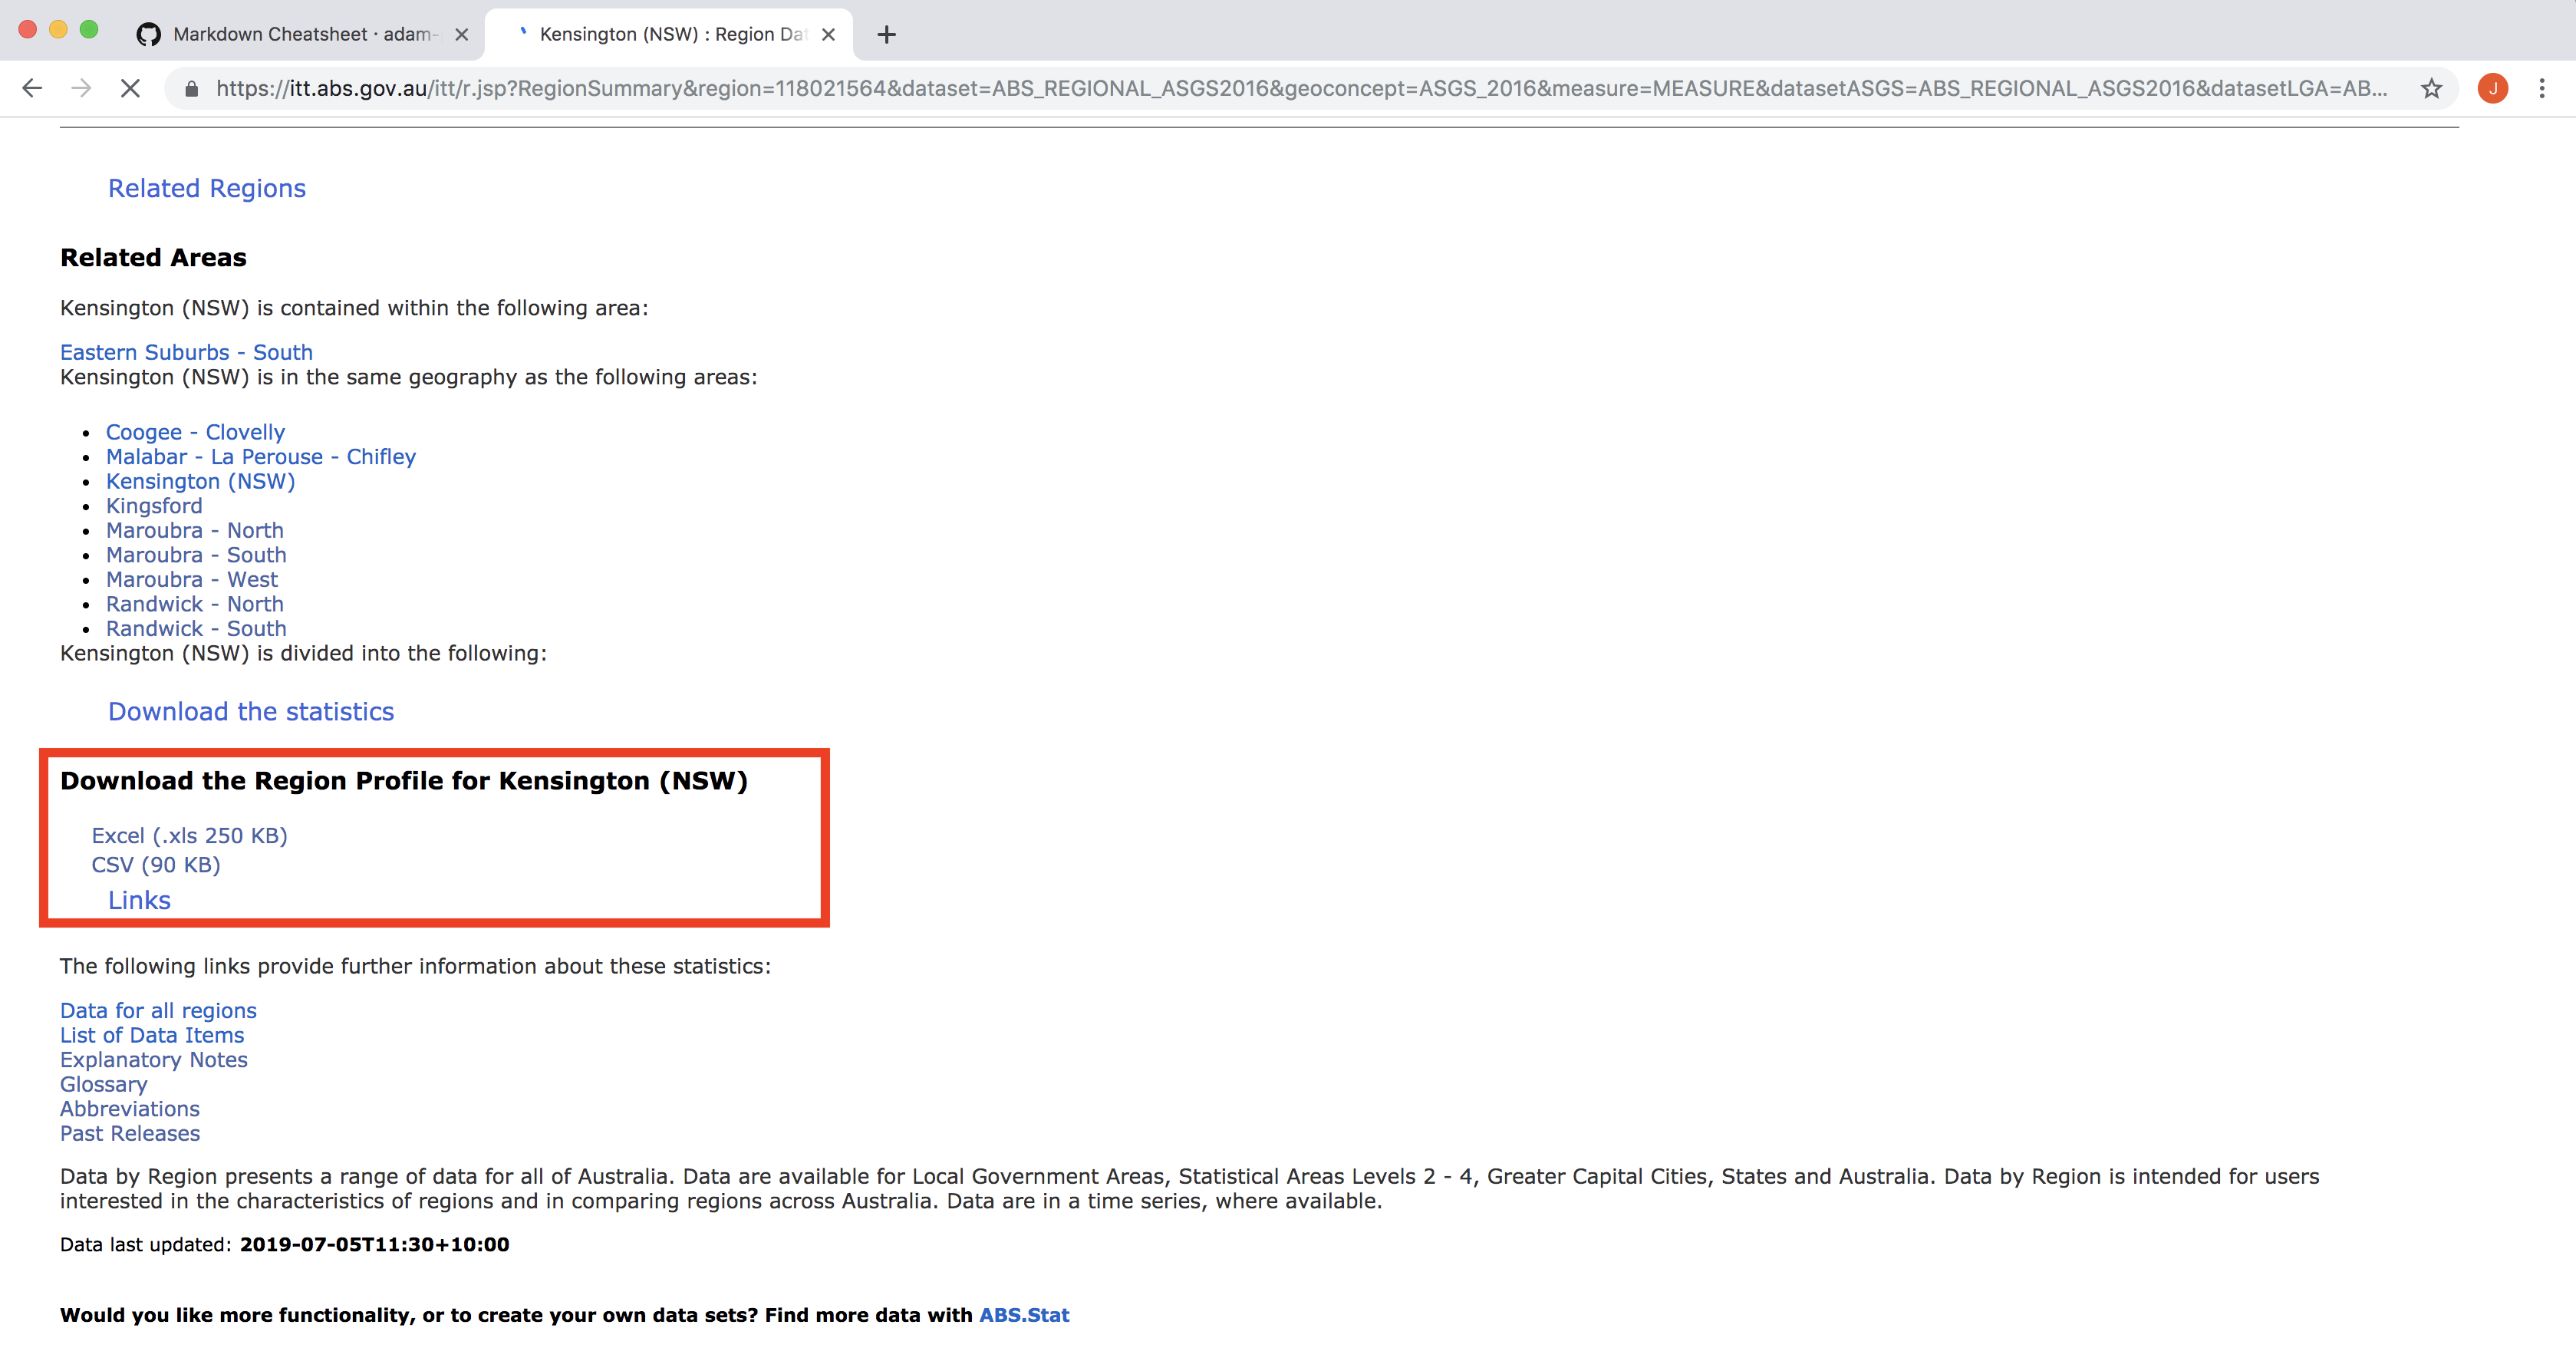

Why do this manually when you can code it???

### Loop for downloading Census CSV files

In [ ]:
import urllib.request

Area_Codes= [118021348, 118021348, 118021350, 118021564, 118021565,
 118021566, 118021567, 118021568, 118021569, 118021570]
 #From Census website, can be expanded

for i in Area_Codes:

    file_url = ("https://itt.abs.gov.au/itt/query.jsp?method=GetGenericData&datasetid=ABS_REGIONAL_ASGS2016"
                "&or=MEASURE&and=ASGS_2016.{number},"
                "FREQUENCY.A&TIME_FORMAT=P1Y&periods=2013,2014,2015,2016,2017,2018&"
                "format=csv&order=original").format(number=i)
    #change URL for each unique area codes
    #argument substitution occurs on 2nd line

    webpage_title(i)
    #See next slide for breakdown

    save_path='/Users/jbrighton/Documents/1161/me/week7/Data/{number}_{name}'.format(number=i, name=title)
    urllib.request.urlretrieve(file_url, save_path)
    #Saves with unique title

### Get title from webpage function

In [19]:
def webpage_title(i):

    from urllib import request
    title_url = ("https://itt.abs.gov.au/itt/r.jsp?RegionSummary&region=118021569&dataset=ABS_REGIONAL_ASGS2016&"
    "geoconcept=ASGS_2016&measure=MEASURE&datasetASGS=ABS_REGIONAL_ASGS2016&datasetLGA=ABS_REGIONAL_LGA2018&"
    "regionLGA=LGA_2018&regionASGS=ASGS_2016").format(number=i)
    #same idea as previous slide except with different URL

    html = request.urlopen(title_url).read().decode('utf8') #reads URL
    html[:60] 
    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    java_title = soup.find('title')
    #Borrowed code. Uses BS package to isolate website page title
    
    content=java_title.string
    title=content.split(":")[0]
    print (title)
    #converts larger title into string so it can be split for area name

In [13]:
#Actual website title
print (content)

Randwick - North : Region Data Summary


In [20]:
webpage_title(118021348)

Randwick - North 



## STEP 2: Extract desired data!


### Listing files in a folder

In [1]:
import os
#required package

path = 'CSV files/'
files = []

for r, d, f in os.walk(path):
#Using os package, opens file from the local path variable
# r=root, d=directories, f = files

    for file in f:
#Loop for all the files in the folder
        
        if file == '.DS_Store':
                pass
#Exception for the DS_Store (short for Desktop Services Store), a file on Mac
#that stores custom attributes of its containing folder, 
#such as the position of icons or the choice of a background image. 
    
        else:
                files.append(os.path.join(r, file))
#Adds file path to an empty list

In [2]:
print (files)

['CSV files/118021348_Coogee - Clovelly ', 'CSV files/118021569_Randwick - North ', 'CSV files/118021564_Kensington (NSW) ', 'CSV files/118021565_Kingsford ', 'CSV files/118021570_Randwick - South ', 'CSV files/118021350_Malabar - La Perouse - Chifley ', 'CSV files/118021568_Maroubra - West ']


### Reading specified information off a file

In [3]:
import pandas as pd
#Package required for dataframes

temp_table= pd.DataFrame()
#creates empty dataframe

for f in files: 
    read_file = pd.read_csv(f)
    #Reads different file for each iteration

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]
    #Searches the file and obtains rows with certain characteristic

In [4]:
print (new_info)

      Time  Value     MEASURE                       Description
1617  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1618  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


### Wipe Index

In [5]:
new_info = new_info.reset_index(drop=True)
    #deletes index column. Makes it easier to compile

print (new_info)

   Time  Value     MEASURE                       Description
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons


### Pulling out area number and name from the file name
Already nicely imbedded from download code :)

In [6]:
make_string = str(f)
#Converts to string so it can be split

split_filepath = make_string.split("/")
#Splits string by / character

name_and_code= split_filepath[1]
#Chooses 2nd part. Remember index starts from zero!

split_name_and_code= name_and_code.split("_")
#Another split of nominated 2nd part by _ character

area_code = split_name_and_code[0]
area_name = split_name_and_code[1]
#Assigns variable for further breakdown for area name and code

In [7]:
print ("Full file path: " + f)

Full file path: CSV files/118021568_Maroubra - West 


In [8]:
print ("area_code: " + area_code)
print ("area_name: " + area_name)

area_code: 118021568
area_name: Maroubra - West 


### Adding columns to dataframe 
for area number and name

In [9]:
###Adding columns with area number and name###

area_column = [area_name,area_name]
code_column = [area_code,area_code]
new_info['Code'] = code_column
new_info['Area'] = area_column
    #Adds new column with area name and code

In [10]:
pd.set_option('display.expand_frame_repr', False)
#Increases dataframe display width. Default breaks it up into two tables

print (new_info)

   Time  Value     MEASURE                       Description       Code              Area
0  2011   19.0  HOMELESS_2  Homeless rate per 10,000 persons  118021568  Maroubra - West 
1  2016   17.8  HOMELESS_2  Homeless rate per 10,000 persons  118021568  Maroubra - West 


### FINAL LOOP: extract info from all files
Combines elements from code above

In [11]:
temp_table= pd.DataFrame()

for f in files: 
    read_file = pd.read_csv(f)

    search_criteria = read_file['Description']== "Homeless rate per 10,000 persons"
    new_info = read_file[search_criteria]

    new_info = new_info.reset_index(drop=True)
    
    make_string = str(f)
    split_filepath = make_string.split("/")
    name_and_code= split_filepath[1]
    split_name_and_code= name_and_code.split("_")
    area_code = split_name_and_code[0]
    area_name = split_name_and_code[1]
 
    area_column = [area_name,area_name]
    code_column = [area_code,area_code]
    new_info['Code'] = code_column
    new_info['Area'] = area_column

    main_table = pd.concat([new_info, temp_table], axis=0)
    temp_table = main_table

#### Note: New part
At the bottom!

In [ ]:
    main_table = pd.concat([new_info, temp_table], axis=0)
    temp_table = main_table
    #Combines data from each iteration into one table

### Formatting: remove unneccessary column

In [12]:
###Formatting: removing unneccessary column/words###

main_table= main_table.drop ("MEASURE",axis=1)
#Deletes measure column
#Note: axis = 1 command changes the drop command from rows to columns

# Main Reveal

In [13]:
print(main_table)

   Time  Value                       Description       Code                             Area
0  2011   19.0  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
0  2011   33.4  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
0  2011   88.5  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
0  2011   59.5  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
0  2011   60.2  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   61.1  Homeless rate per 10,000 persons  118021564           

### More Formatting: Table with 2016 Data only

In [14]:
###Formatting: Table with 2016 Data only###

main_table= main_table.drop(0)
#Drops all rows with index 0 (also 2011 rows)

print(main_table)

   Time  Value                       Description       Code                             Area
1  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
1  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
1  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South 
1  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
1  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
1  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
1  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 



## STEP 3: Unpack the Geopackage


### Good resources

Downloaded the 2016 New South Wales Geopackage on the census website. 
**Note:** This was in a different section to the other data scraped above
https://datapacks.censusdata.abs.gov.au/geopackages/

Extracted Statisical Area 2 Geojson with shape files inside from GPKG file with this program:
http://ngageoint.github.io/geopackage-js/

If you want to explore the boundaries and layering of the GeoJson file, open with this:
http://geojson.io/#map=6/-32.954/150.054
**Note:** It is a little slow

This link will reformat the file to make it readable by a human in python however this is not necessary
https://beautifier.io/


## Boundary line comparison
Suburbs vs census areas

<img src="Screen Shot 2019-08-09 at 1.20.15 pm.png" width= "450"> 
<img src="Screen Shot 2019-08-09 at 1.20.50 pm.png" width= "600">

### Open GeoJson

In [15]:
import geopandas as gpd 
import matplotlib.pyplot as plt

df = gpd.read_file('../formatted_SA2.geojson')
#Use geopandas to read the file
#df - dataframe

In [16]:
df.head()
#only displays top rows

primaryindex sa2_maincode_2016  Count_home_Census_Nt_0_14_yr  Count_hom_Census_Nt_15_24_yr  Count_hom_Census_Nt_25_34_yr  Count_hom_Census_Nt_35_44_yr  Count_hom_Census_Nt_45_54_yr  Count_hom_Census_Nt_55_64_yr  Count_hom_Census_Nt_65_74_yr  Count_hom_Census_Nt_75_84_yr  ...  Difnt_Usl_add_5_yr_ago_Tot_M  Difnt_Usl_add_5_yr_ago_Tot_F  Difnt_Usl_add_5_yr_ago_Tot_P  N_stated_M_G42  N_stated_F_G42  N_stated_P_G42  Tot_M_G42  Tot_F_G42  Tot_P_G42                                           geometry
0             1         124031461                          3488                          1915                          2446                          2371                          1897                          2026                          1666                           659  ...                          2547                          2712                          5260             451             474             924       7750       8284      16036  POLYGON ((150.668015306 -33.75867972099996, 15...
1             2         110021194                           996                           493                           382                           623                           773                          1206                          1055                           484  ...                           871                           973                          1848             385             392             773       3113       3235       6343  POLYGON ((151.957926 -28.51592999699994, 151.9...
2             3         124041468                          1273                          1105                          1041                          1068                          1053                           816                           546                           186  ...                           789                           762                          1553             991             464            1452       3869       3166       7037  POLYGON ((150.695831007 -33.60961500899998, 15...
3             4         111021217                          3240                          1616                          2016                          2063                          1590                          1298                           977                           494  ...                          2643                          2937                          5576             299             316             616       6259       6706      12959  POLYGON ((151.6008459520001 -32.88926030699997...
4             5         103021062                          1375                           617                           732                           658                           735                           823                           667                           448  ...                           799                           879                          1678             420             372             791       3071       3049       6119  POLYGON ((146.0950879860001 -33.27617800199994...

[5 rows x 311 columns]

**Note:** Actual size = (578, 311). Found with *df.shape*

This is a massive file with a lot of extra data imbedded. I have only displayed the top with df.head

The actual size = (578, 311). This can be found with df.shape

Note: One could skip to this section and still have a lot of data to compare different regions with. However many of the categories are also not on here such as homelessness and since I did the work I thought I might as well incorporate it!


### Formatting: keep only area-codes and shape files columns

In [17]:
df = df[['sa2_maincode_2016','geometry']]

df.head()

sa2_maincode_2016                                           geometry
0         124031461  POLYGON ((150.668015306 -33.75867972099996, 15...
1         110021194  POLYGON ((151.957926 -28.51592999699994, 151.9...
2         124041468  POLYGON ((150.695831007 -33.60961500899998, 15...
3         111021217  POLYGON ((151.6008459520001 -32.88926030699997...
4         103021062  POLYGON ((146.0950879860001 -33.27617800199994...

### Formatting: delete 2 rows without shape files
Happen to be last two rows

In [18]:
df = df.drop([576,577], axis=0)
#576, 577 refer to row number



## STEP 4: Merge Census and Geopackage dataframes


### List unique values in a column

In [19]:
code_list = main_table.Code.unique()
#List unique area codes from first table. Important since not all the areas were used in this run

In [20]:
print (code_list)

['118021568' '118021350' '118021570' '118021565' '118021564' '118021569'
 '118021348']


### Keep rows from geopackage that match area codes

In [21]:
newdf = df[df['sa2_maincode_2016'].isin(code_list)]
#Makes new dataframe with codes from sa2_maincode_2016 that match code_list made in step above

newdf2 = newdf[['sa2_maincode_2016', 'geometry']]
#Formatting: when you make new dataframe old rows appear especially if you didn't define old dataframe without them
#Unneccesary with a refactor

In [22]:
newdf2 

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...

### Sort area codes by ascending order

In [23]:
newdf2.sort_values(by=['sa2_maincode_2016'], inplace=True)
#Sorts streamlines geopackage dataframe by the values in sa2_maincode_2016. Descending order by default

main_table.sort_values(by=['Code'], inplace=True)
#Does the same for census dataframe by Code column

#This ensures that they match up when we merge them!

In [24]:
#For example,
newdf2

sa2_maincode_2016                                           geometry
8           118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...
303         118021350  POLYGON ((151.2219293050001 -33.95919365399993...
24          118021564  POLYGON ((151.2225498050001 -33.90130016199998...
536         118021565  POLYGON ((151.2359737380001 -33.91904537999994...
129         118021568  POLYGON ((151.2395608490001 -33.94167069499997...
109         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...
101         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...

### Merge!

In [25]:
newdf2 = newdf2.reset_index(drop=True)
main_table = main_table.reset_index(drop=True)
#Reset index values, not completely necessary but it doesn't like it when they are different

final_table = pd.concat([newdf2, main_table], axis=1)
#Join line! Note: axis=1 puts them next not each other rather than below like axis=0 which is default

In [26]:
final_table
#Check area codes they match up, they should!

sa2_maincode_2016                                           geometry  Time  Value                       Description       Code                             Area
0         118021348  (POLYGON ((151.249332994 -33.91452159399995, 1...  2016   48.0  Homeless rate per 10,000 persons  118021348               Coogee - Clovelly 
1         118021350  POLYGON ((151.2219293050001 -33.95919365399993...  2016   29.7  Homeless rate per 10,000 persons  118021350  Malabar - La Perouse - Chifley 
2         118021564  POLYGON ((151.2225498050001 -33.90130016199998...  2016   61.1  Homeless rate per 10,000 persons  118021564                Kensington (NSW) 
3         118021565  POLYGON ((151.2359737380001 -33.91904537999994...  2016  106.1  Homeless rate per 10,000 persons  118021565                       Kingsford 
4         118021568  POLYGON ((151.2395608490001 -33.94167069499997...  2016   17.8  Homeless rate per 10,000 persons  118021568                 Maroubra - West 
5         118021569  POLYGON ((151.249332994 -33.91452159399995, 15...  2016   62.9  Homeless rate per 10,000 persons  118021569                Randwick - North 
6         118021570  POLYGON ((151.249332994 -33.91452159399995, 15...  2016  102.7  Homeless rate per 10,000 persons  118021570                Randwick - South


## STEP 5: Plot Plot Plot Away


In [31]:
###Increases plot size###

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

### Histogram

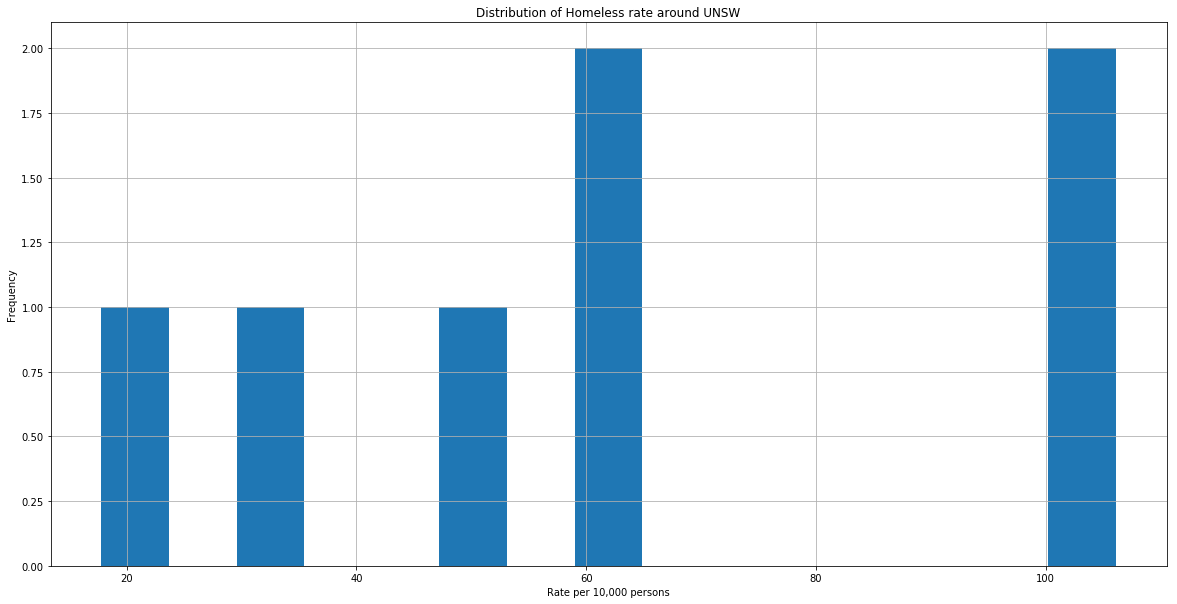

In [32]:
final_table.Value.hist(bins=15)

plt.xlabel("Rate per 10,000 persons")
plt.ylabel("Frequency")
plt.title("Distribution of Homeless rate around UNSW");

In [28]:
###Centorid function for labels###

def add_centroid(row):
    return row.geometry.centroid

final_table["centroid"] = final_table.apply(add_centroid, axis=1)

Text(0.5, 1.0, 'Map of the Rate of Homeless around UNSW')

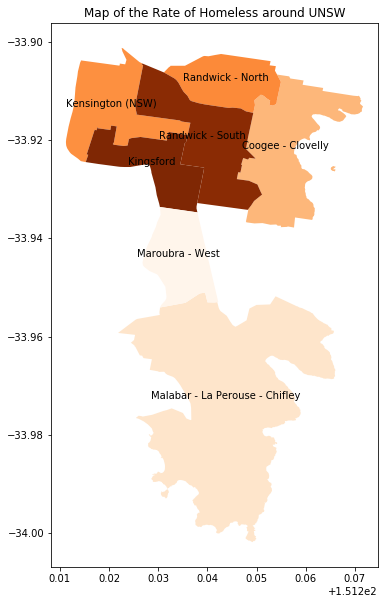

In [30]:
final_table.plot(column='Value', cmap='Oranges');

for idx, row in final_table.iterrows():
    plt.annotate(s=row.Area, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
    
plt.title("Map of the Rate of Homeless around UNSW")



# MORE RESULTS:
with other fun data!!!!



## Homeless In Sydney
Process example, extrapolated

### Histogram, whole of Greater Sydney

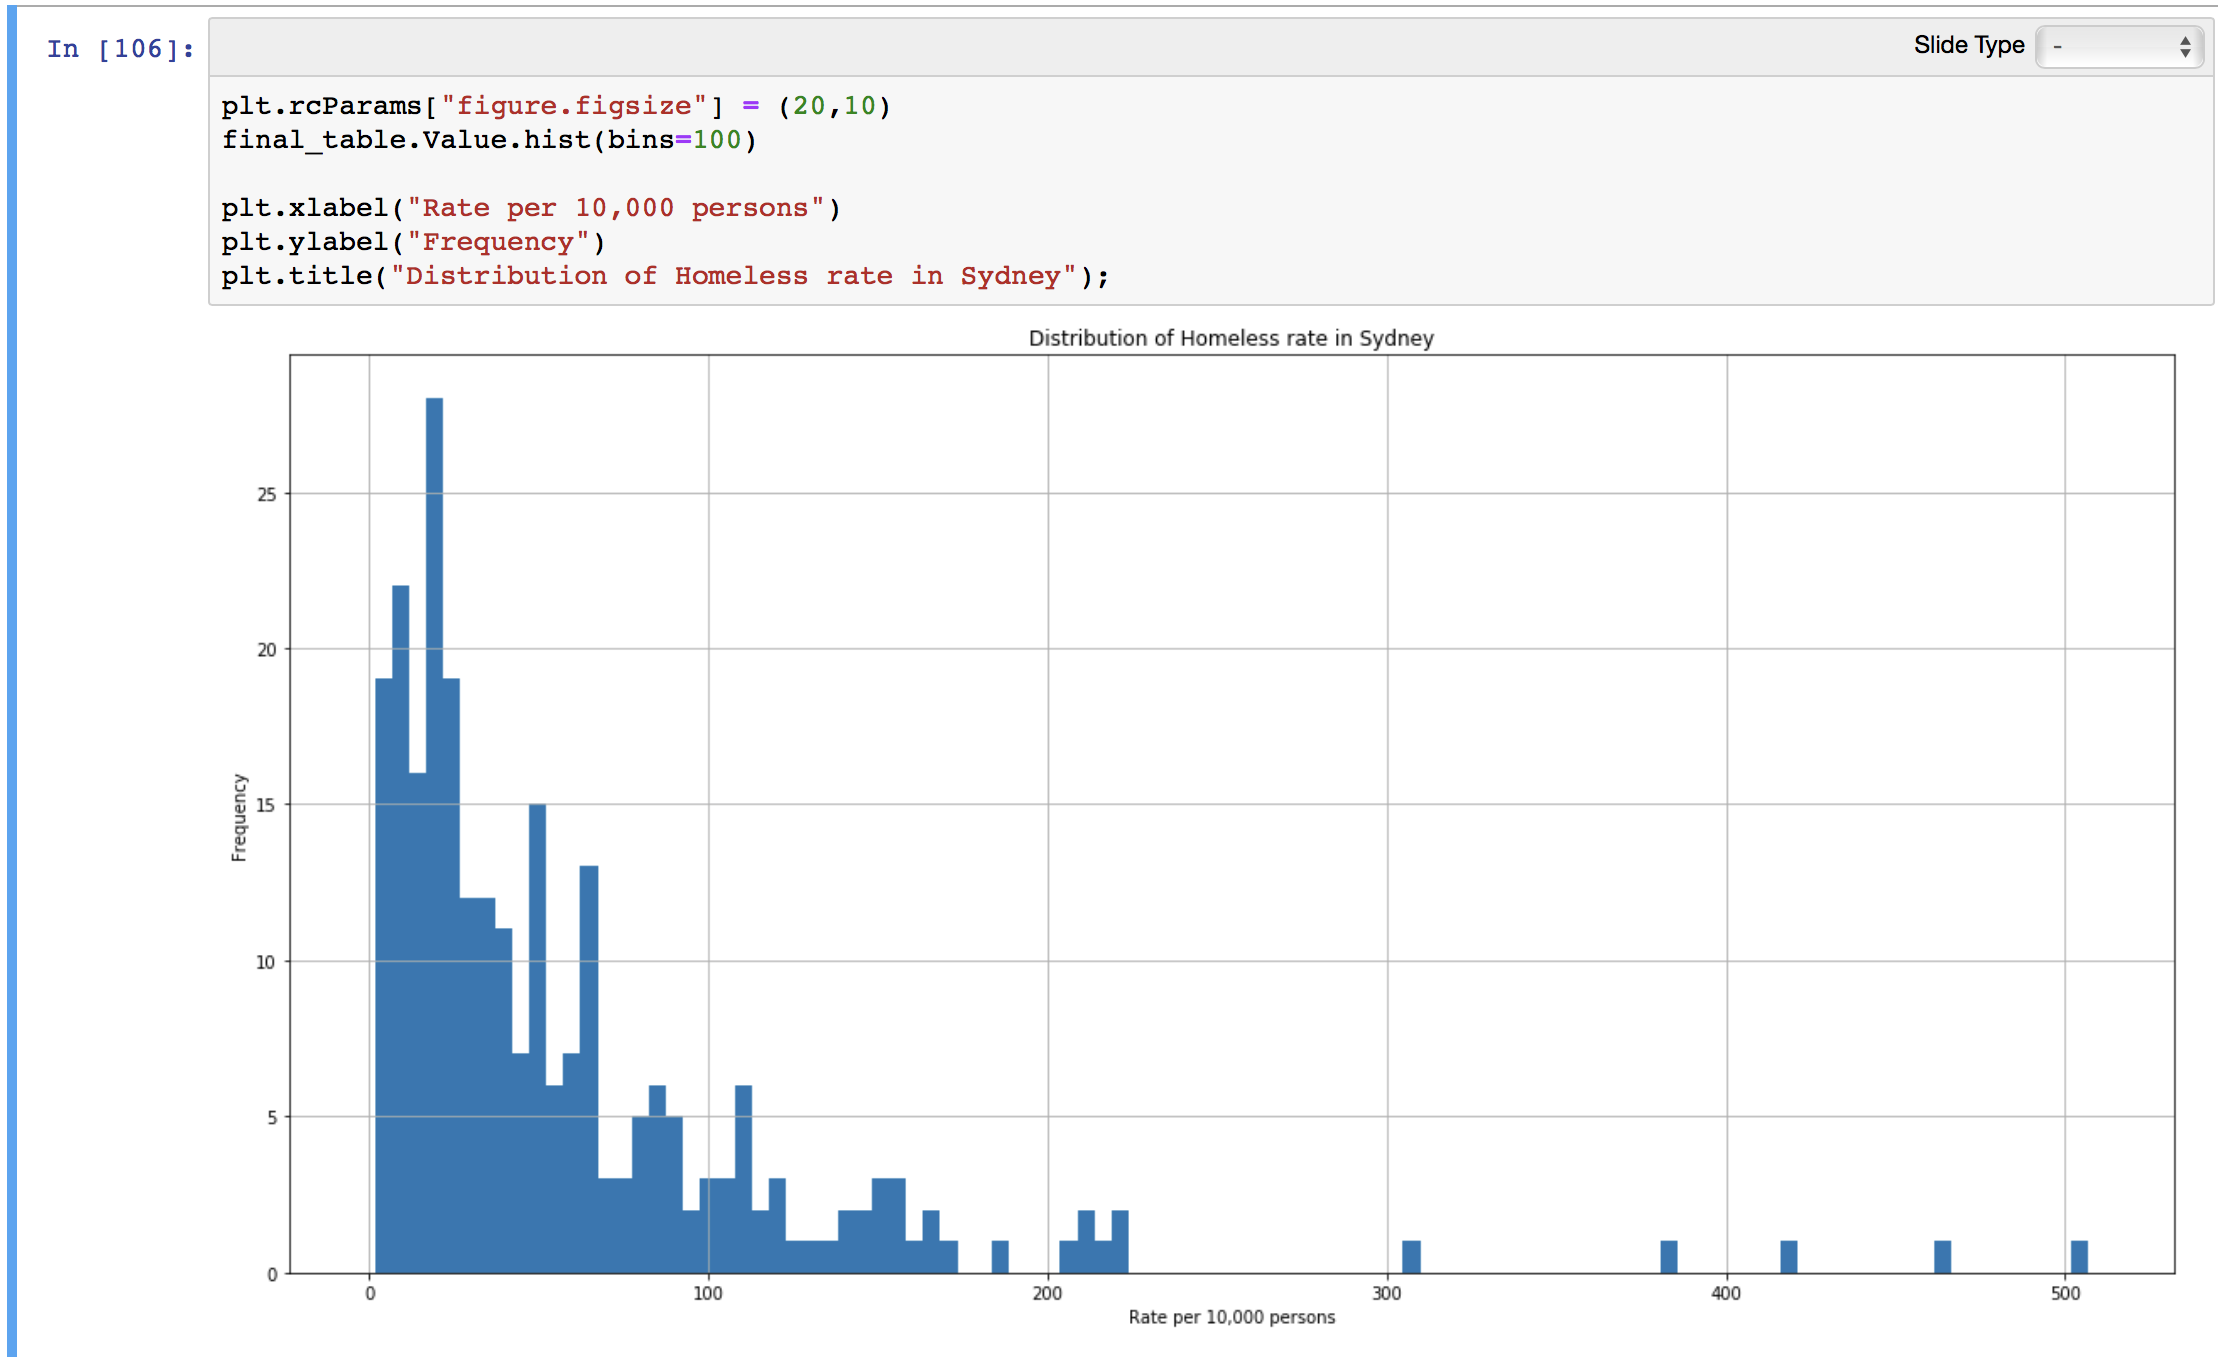

#### Observations
In Sydney, rates of homeless are generally quite low bar a few pockets where rate is 5x the average

### Can you guess what suburbs have highest rates of Homelessness in Sydney??

Have a think quickly as the answer will be revealed

### Better Map Around Uni

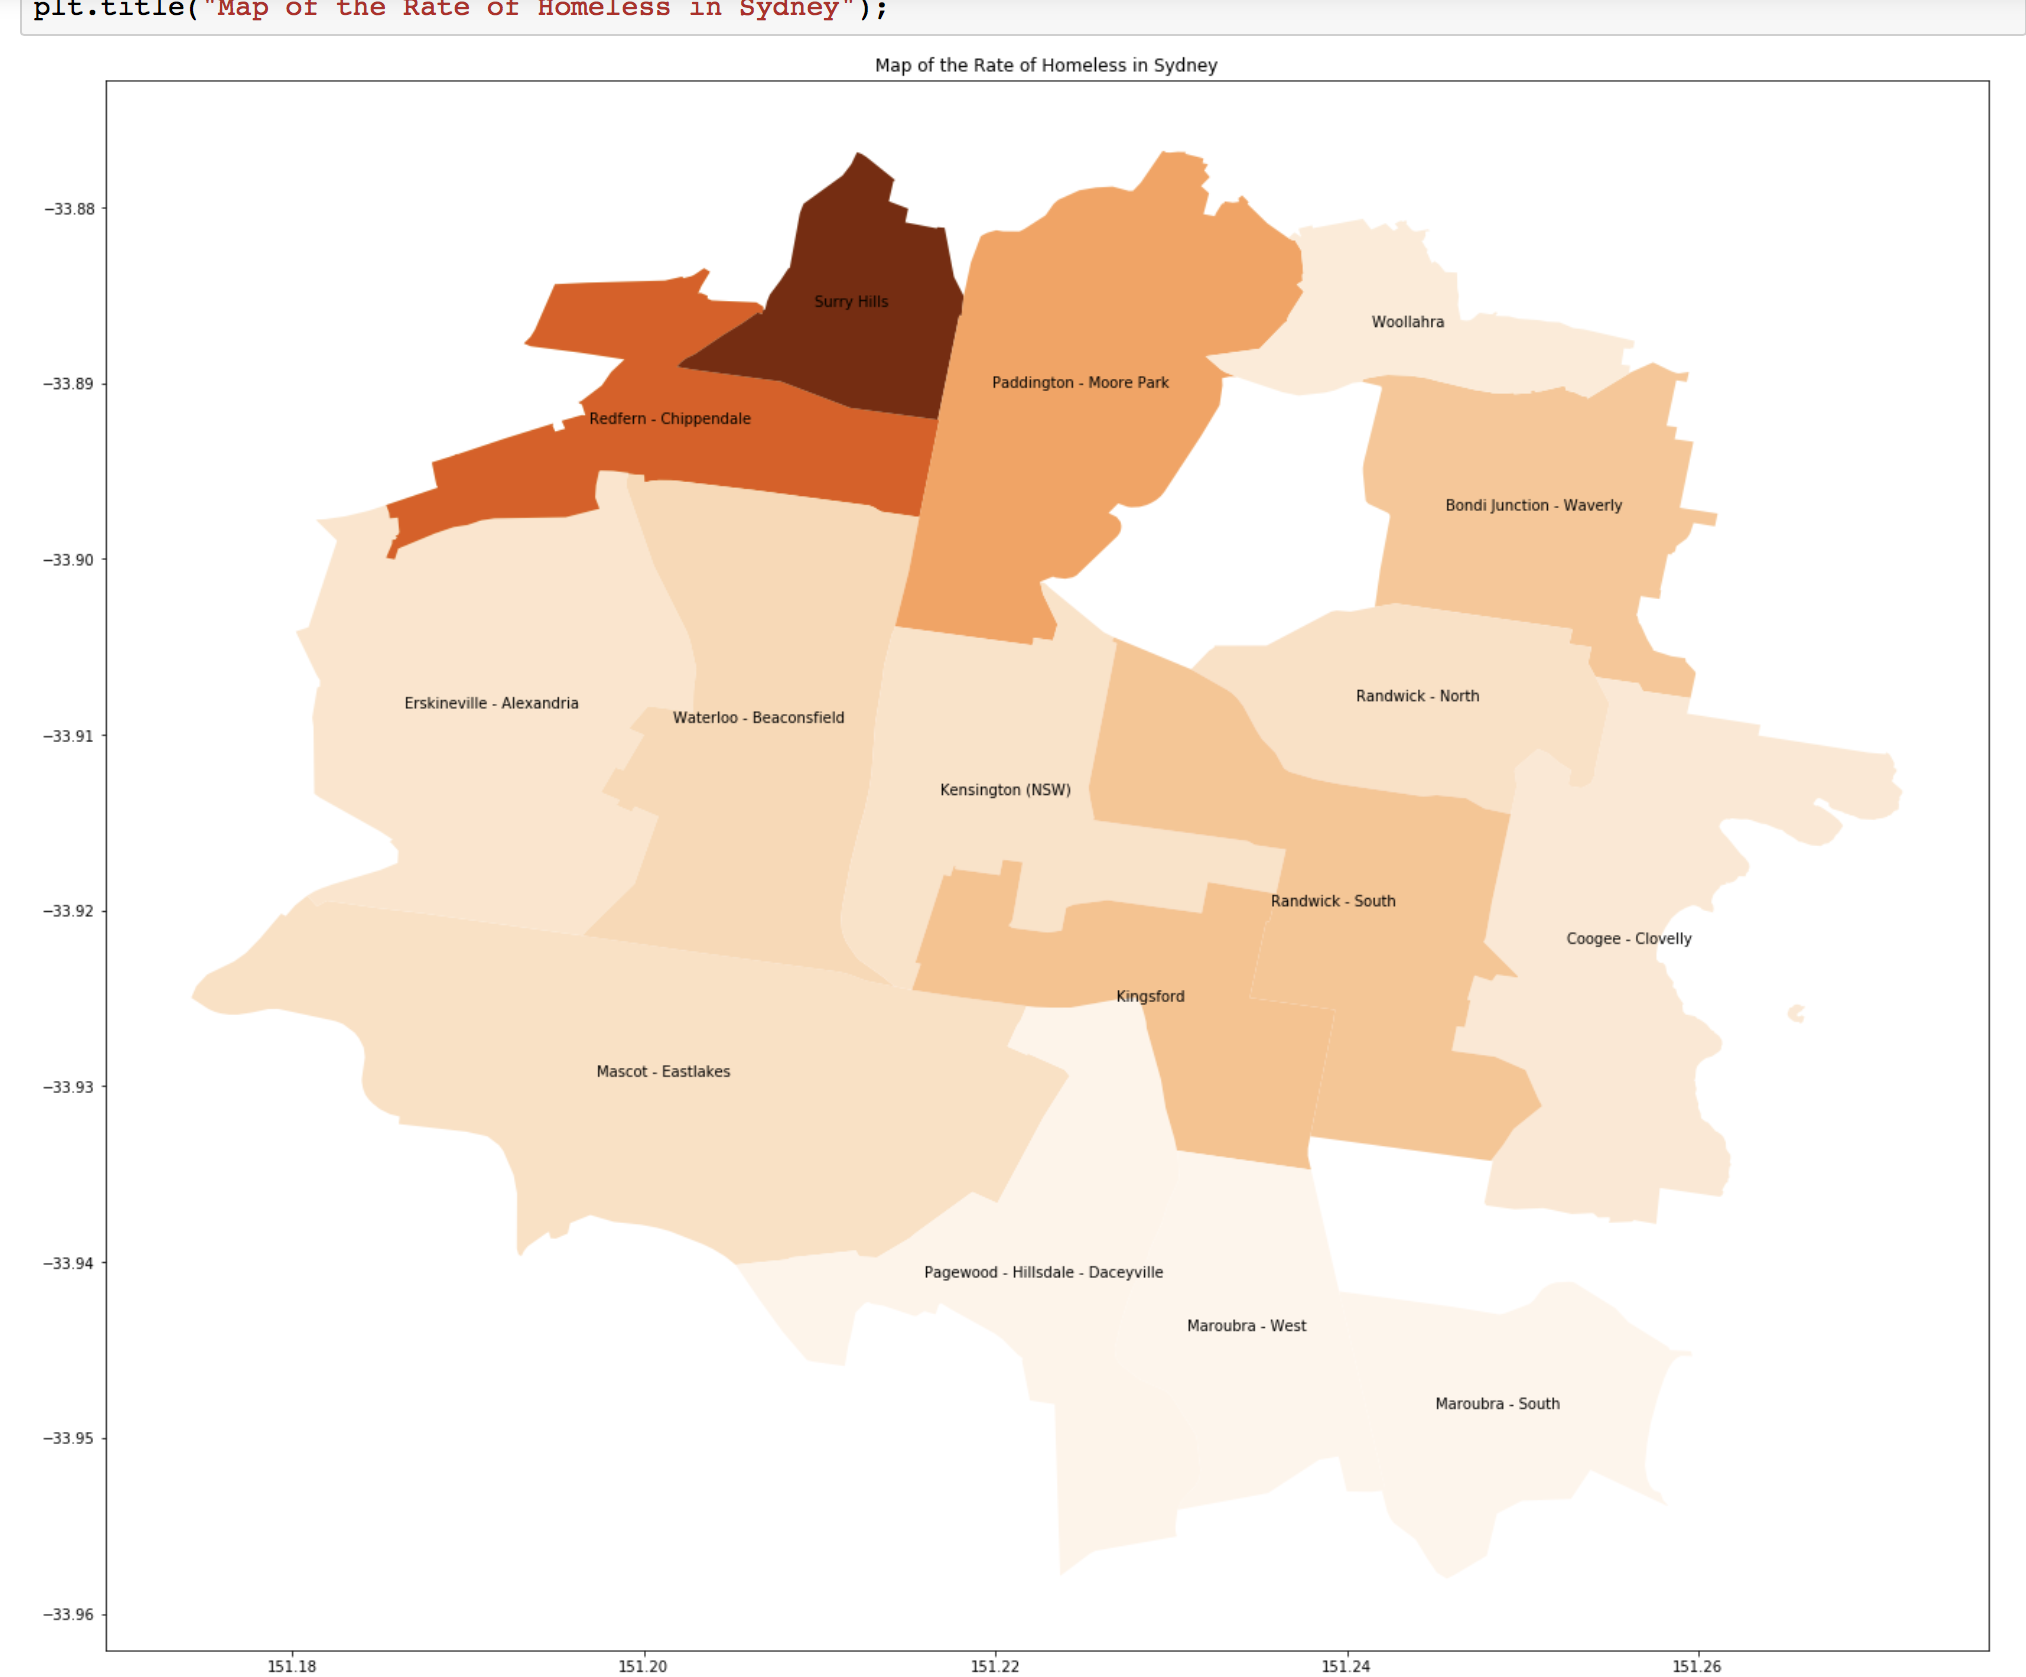

#### Observations: 
Significantly different from the process example. Introduction of Surrey Hills with much high rate of homelessness skews the data so Kingsford and Randwick South are no longer red.

### Bigger Again

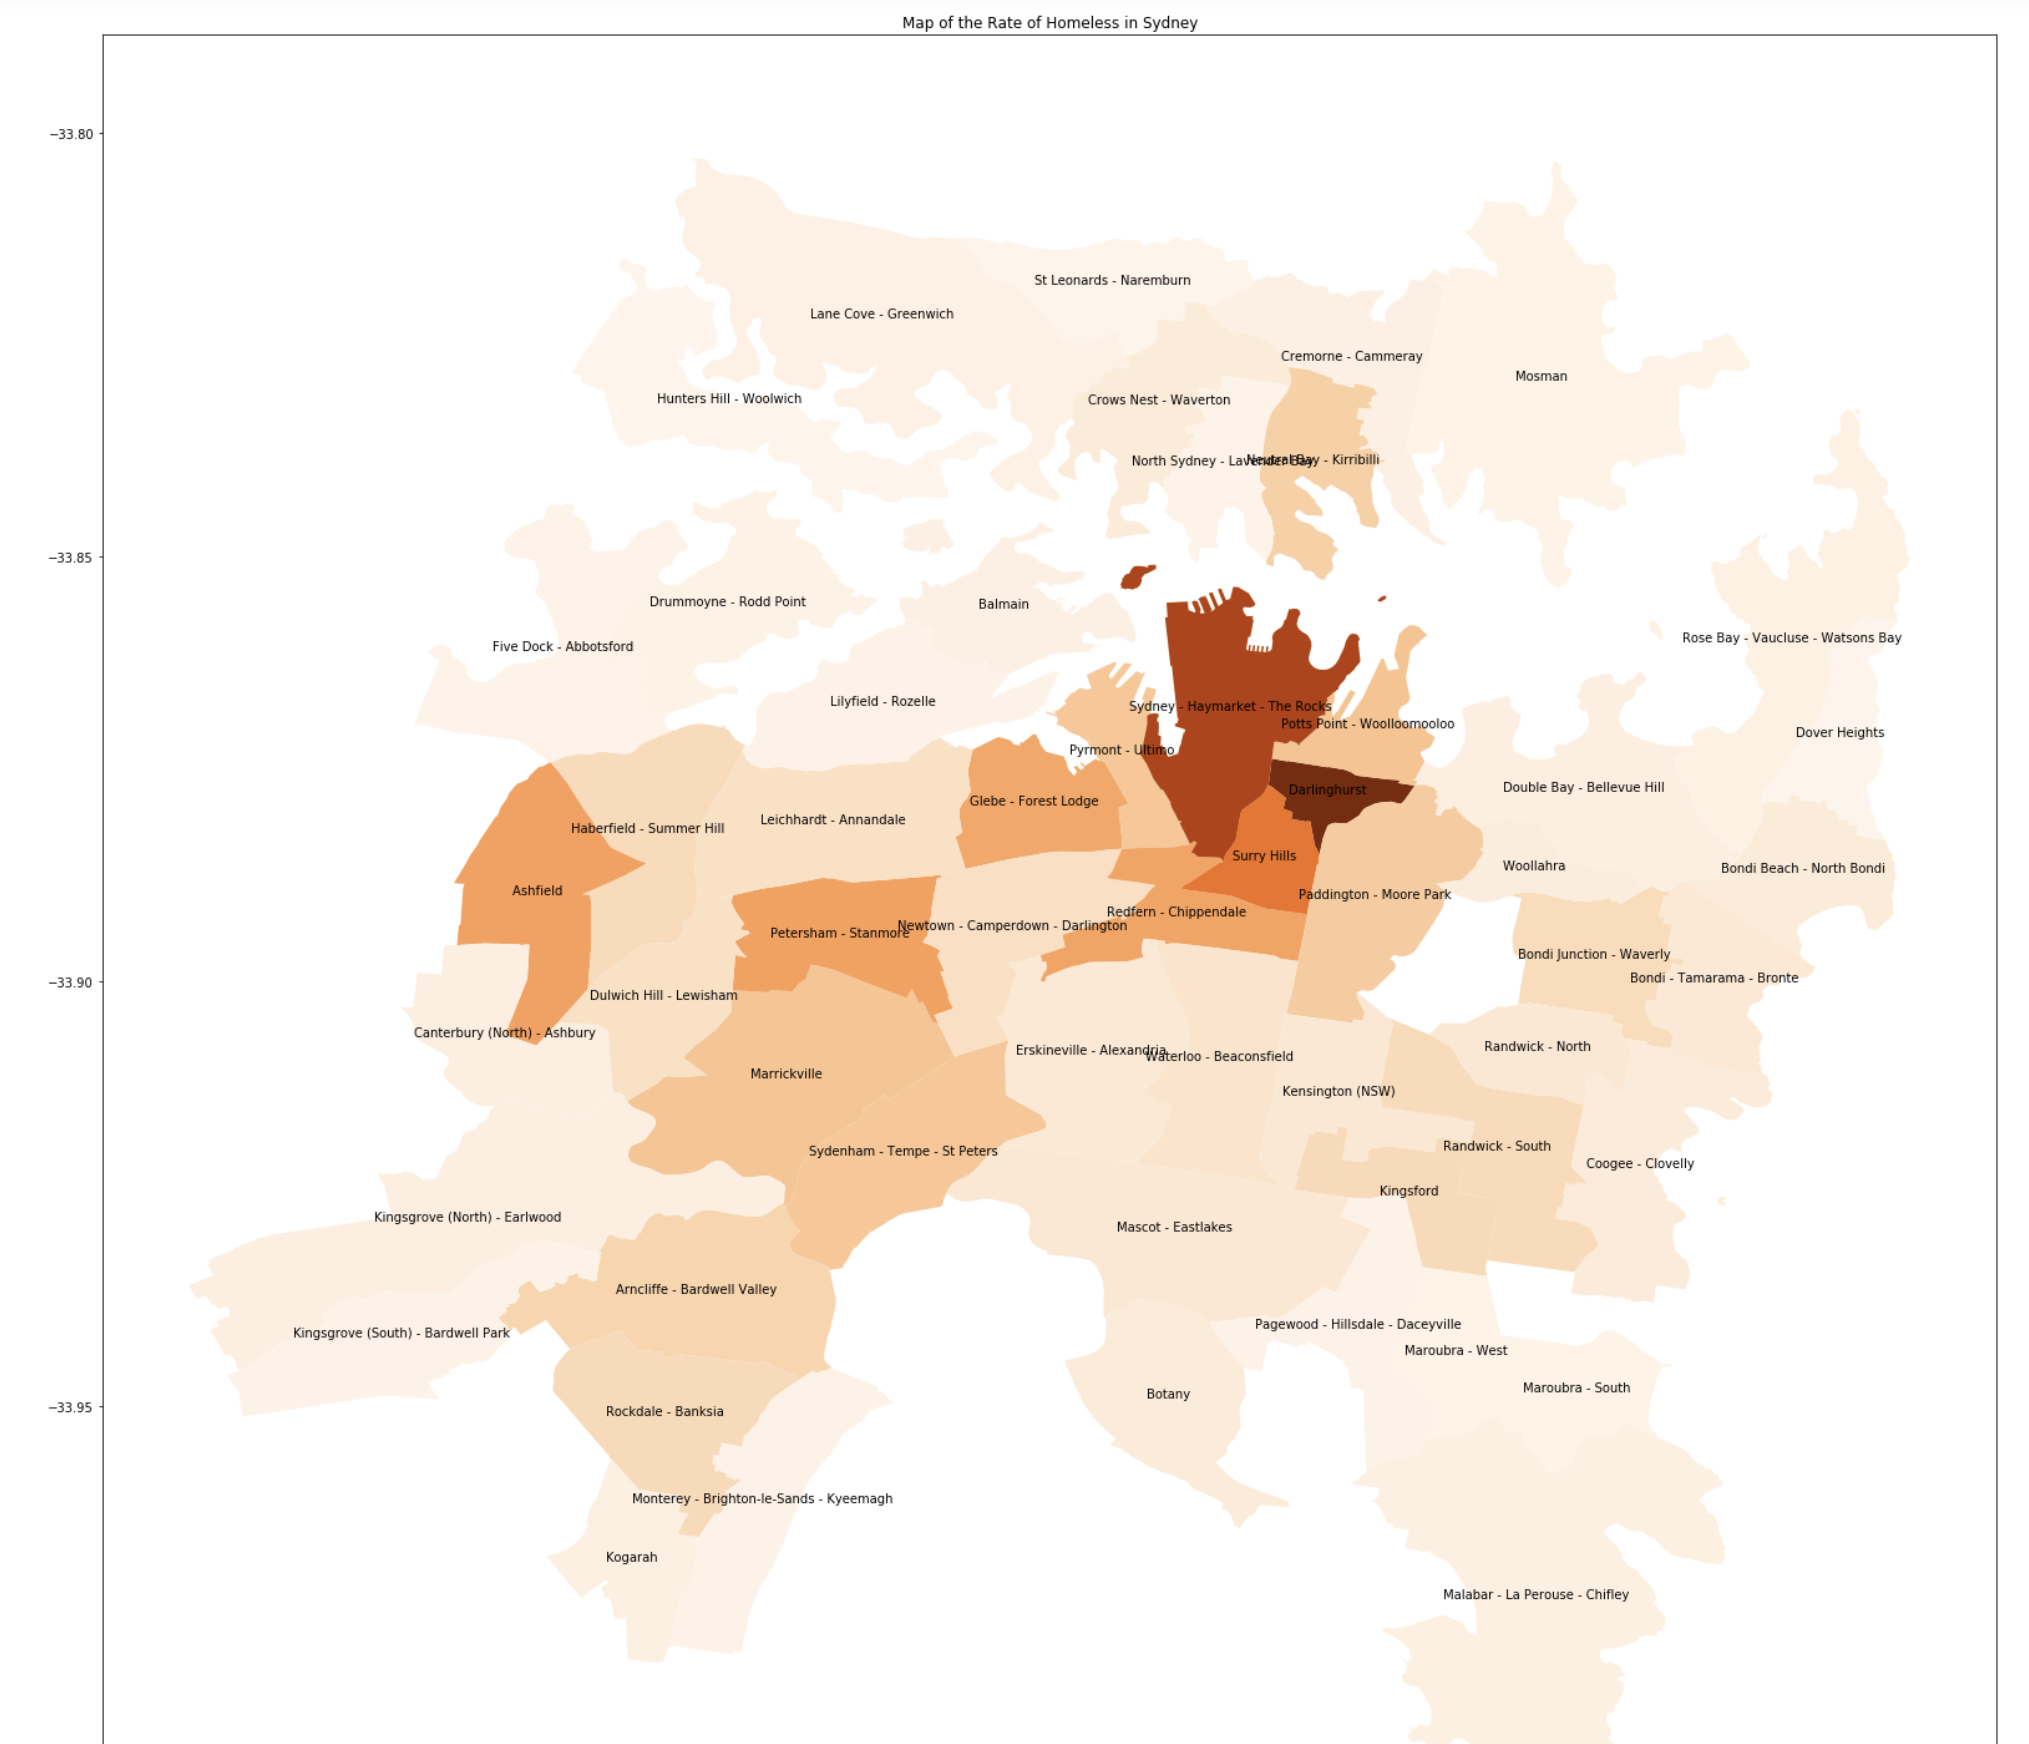

#### Observations:
As expected, suburbs in the Central Business District of Sydney (CBD) have highest rates of homelessness. Homeless population is very visible in CBD and beggars are quite common. 

### Most of Sydney
*This is where it gets interesting!*

**Note:** Labels removed, too hard to read

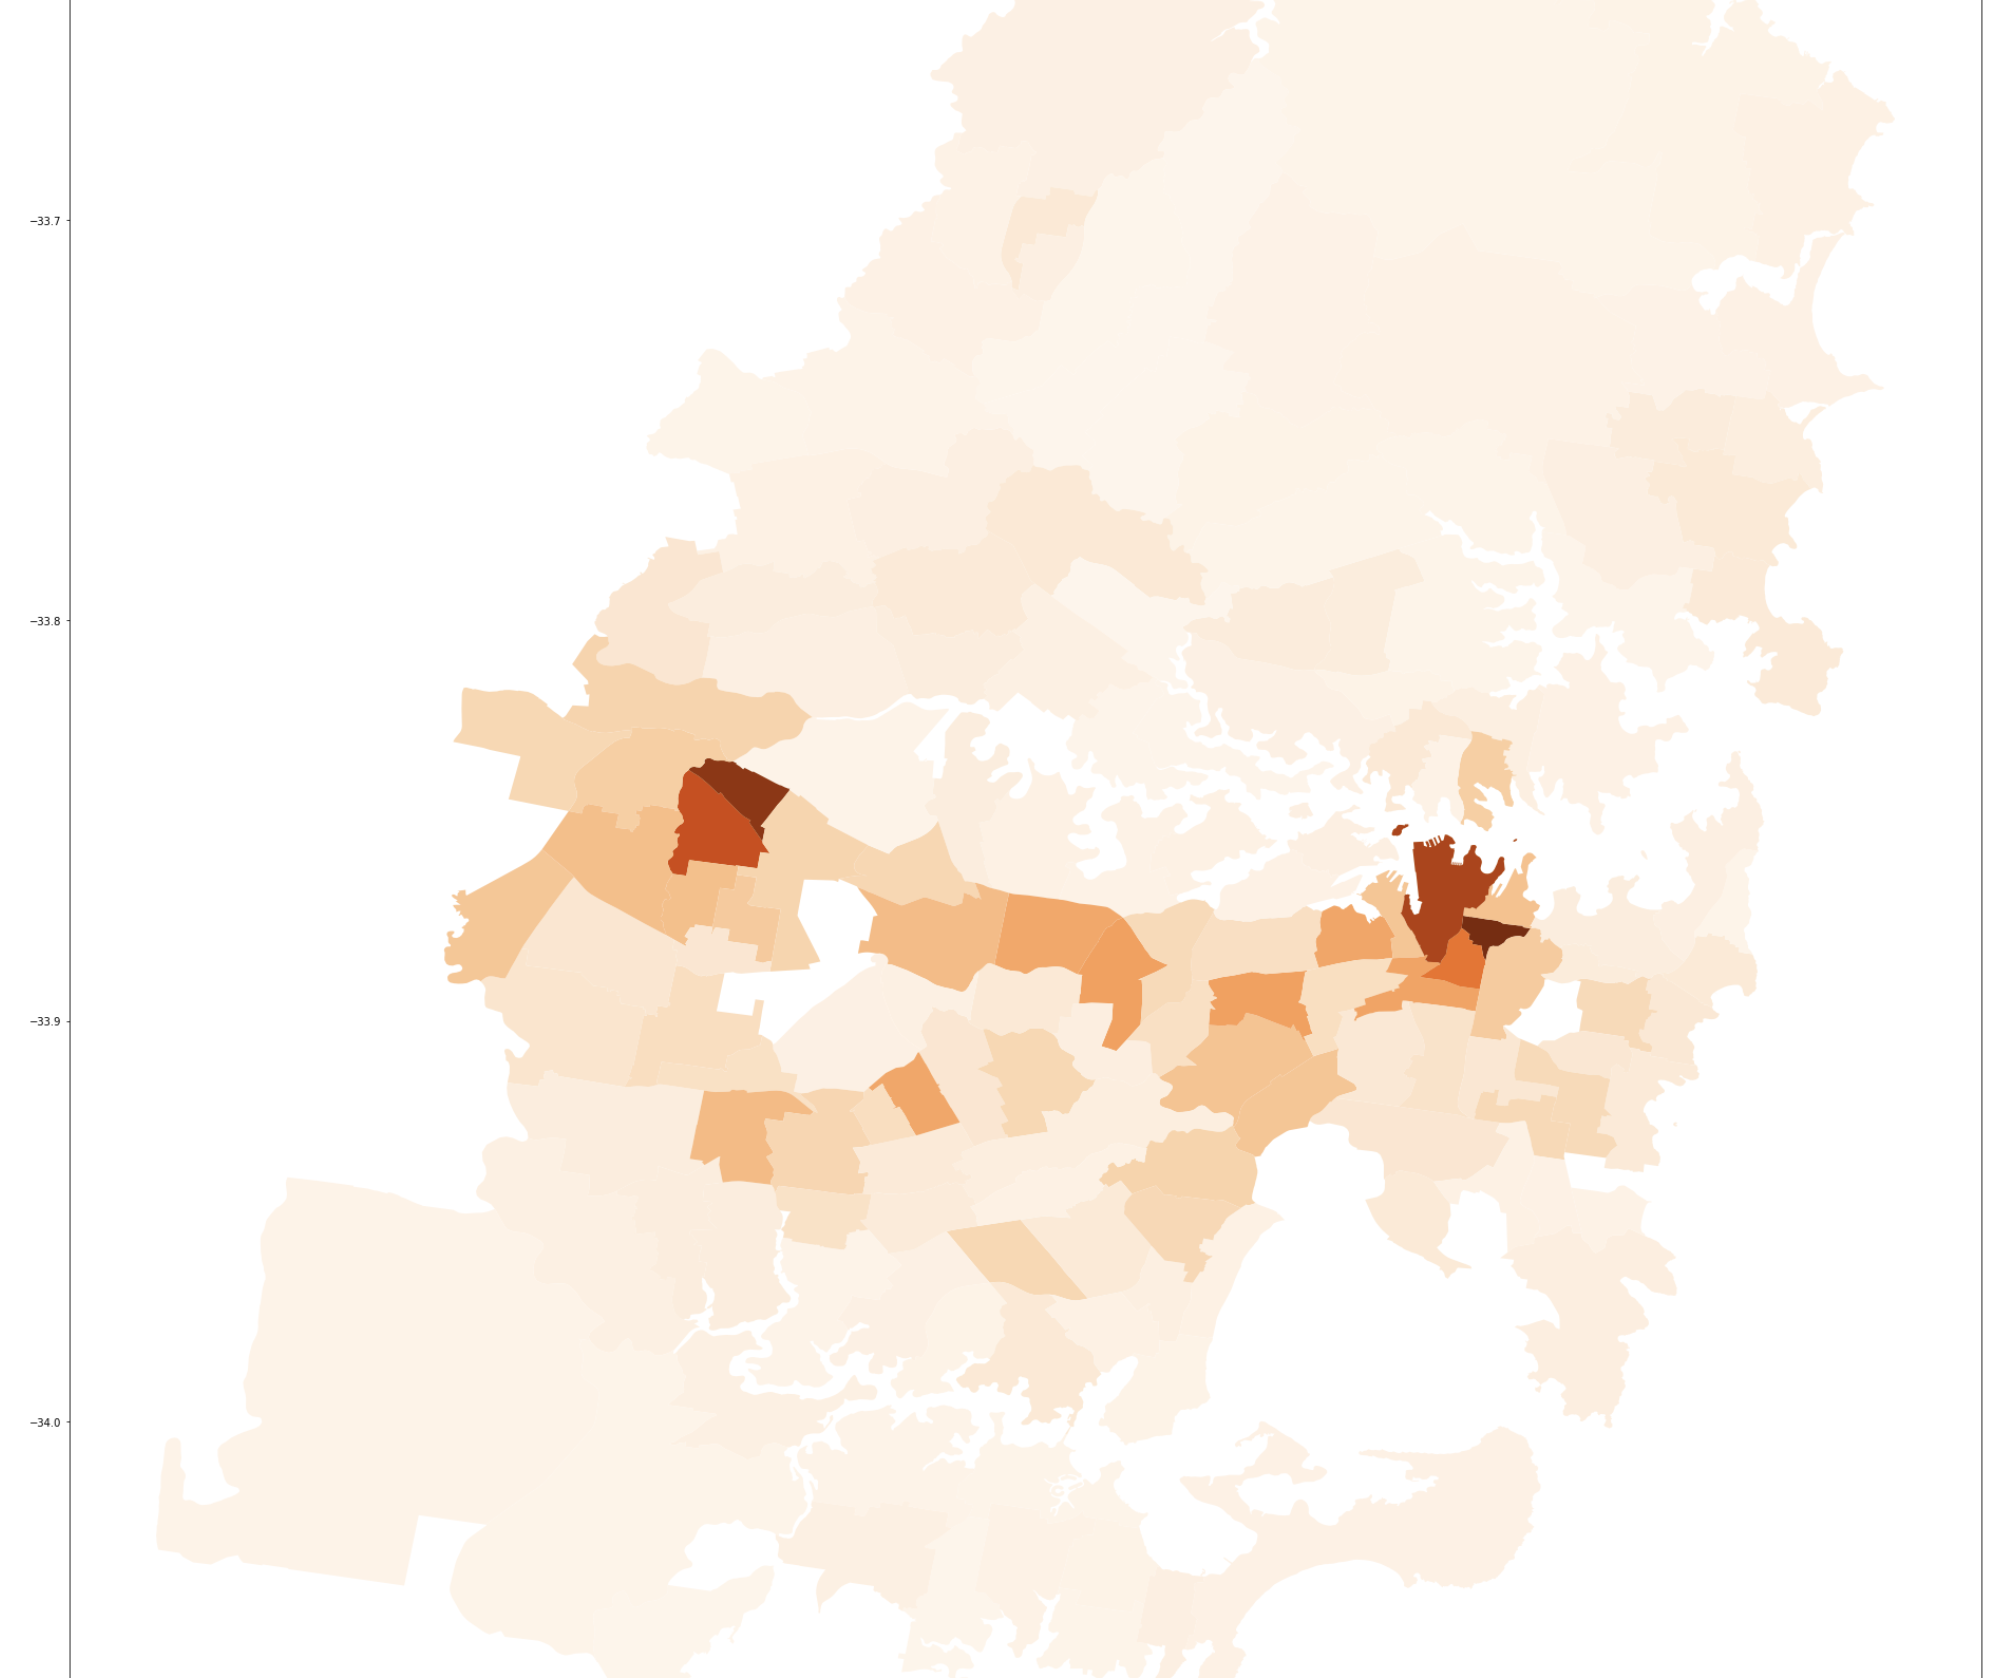

### Can you guess what suburb is red on left side of the diagram?

*Answer:* **Auburn** 

#### Observation
Unexpectly, Auburn North and South have rates of homeless that rival the city! Homelessness is also much more common on the south side of the harbour

## Greater Sydney
As defined by the census (inclusive of Gosford and Blue Mountains)

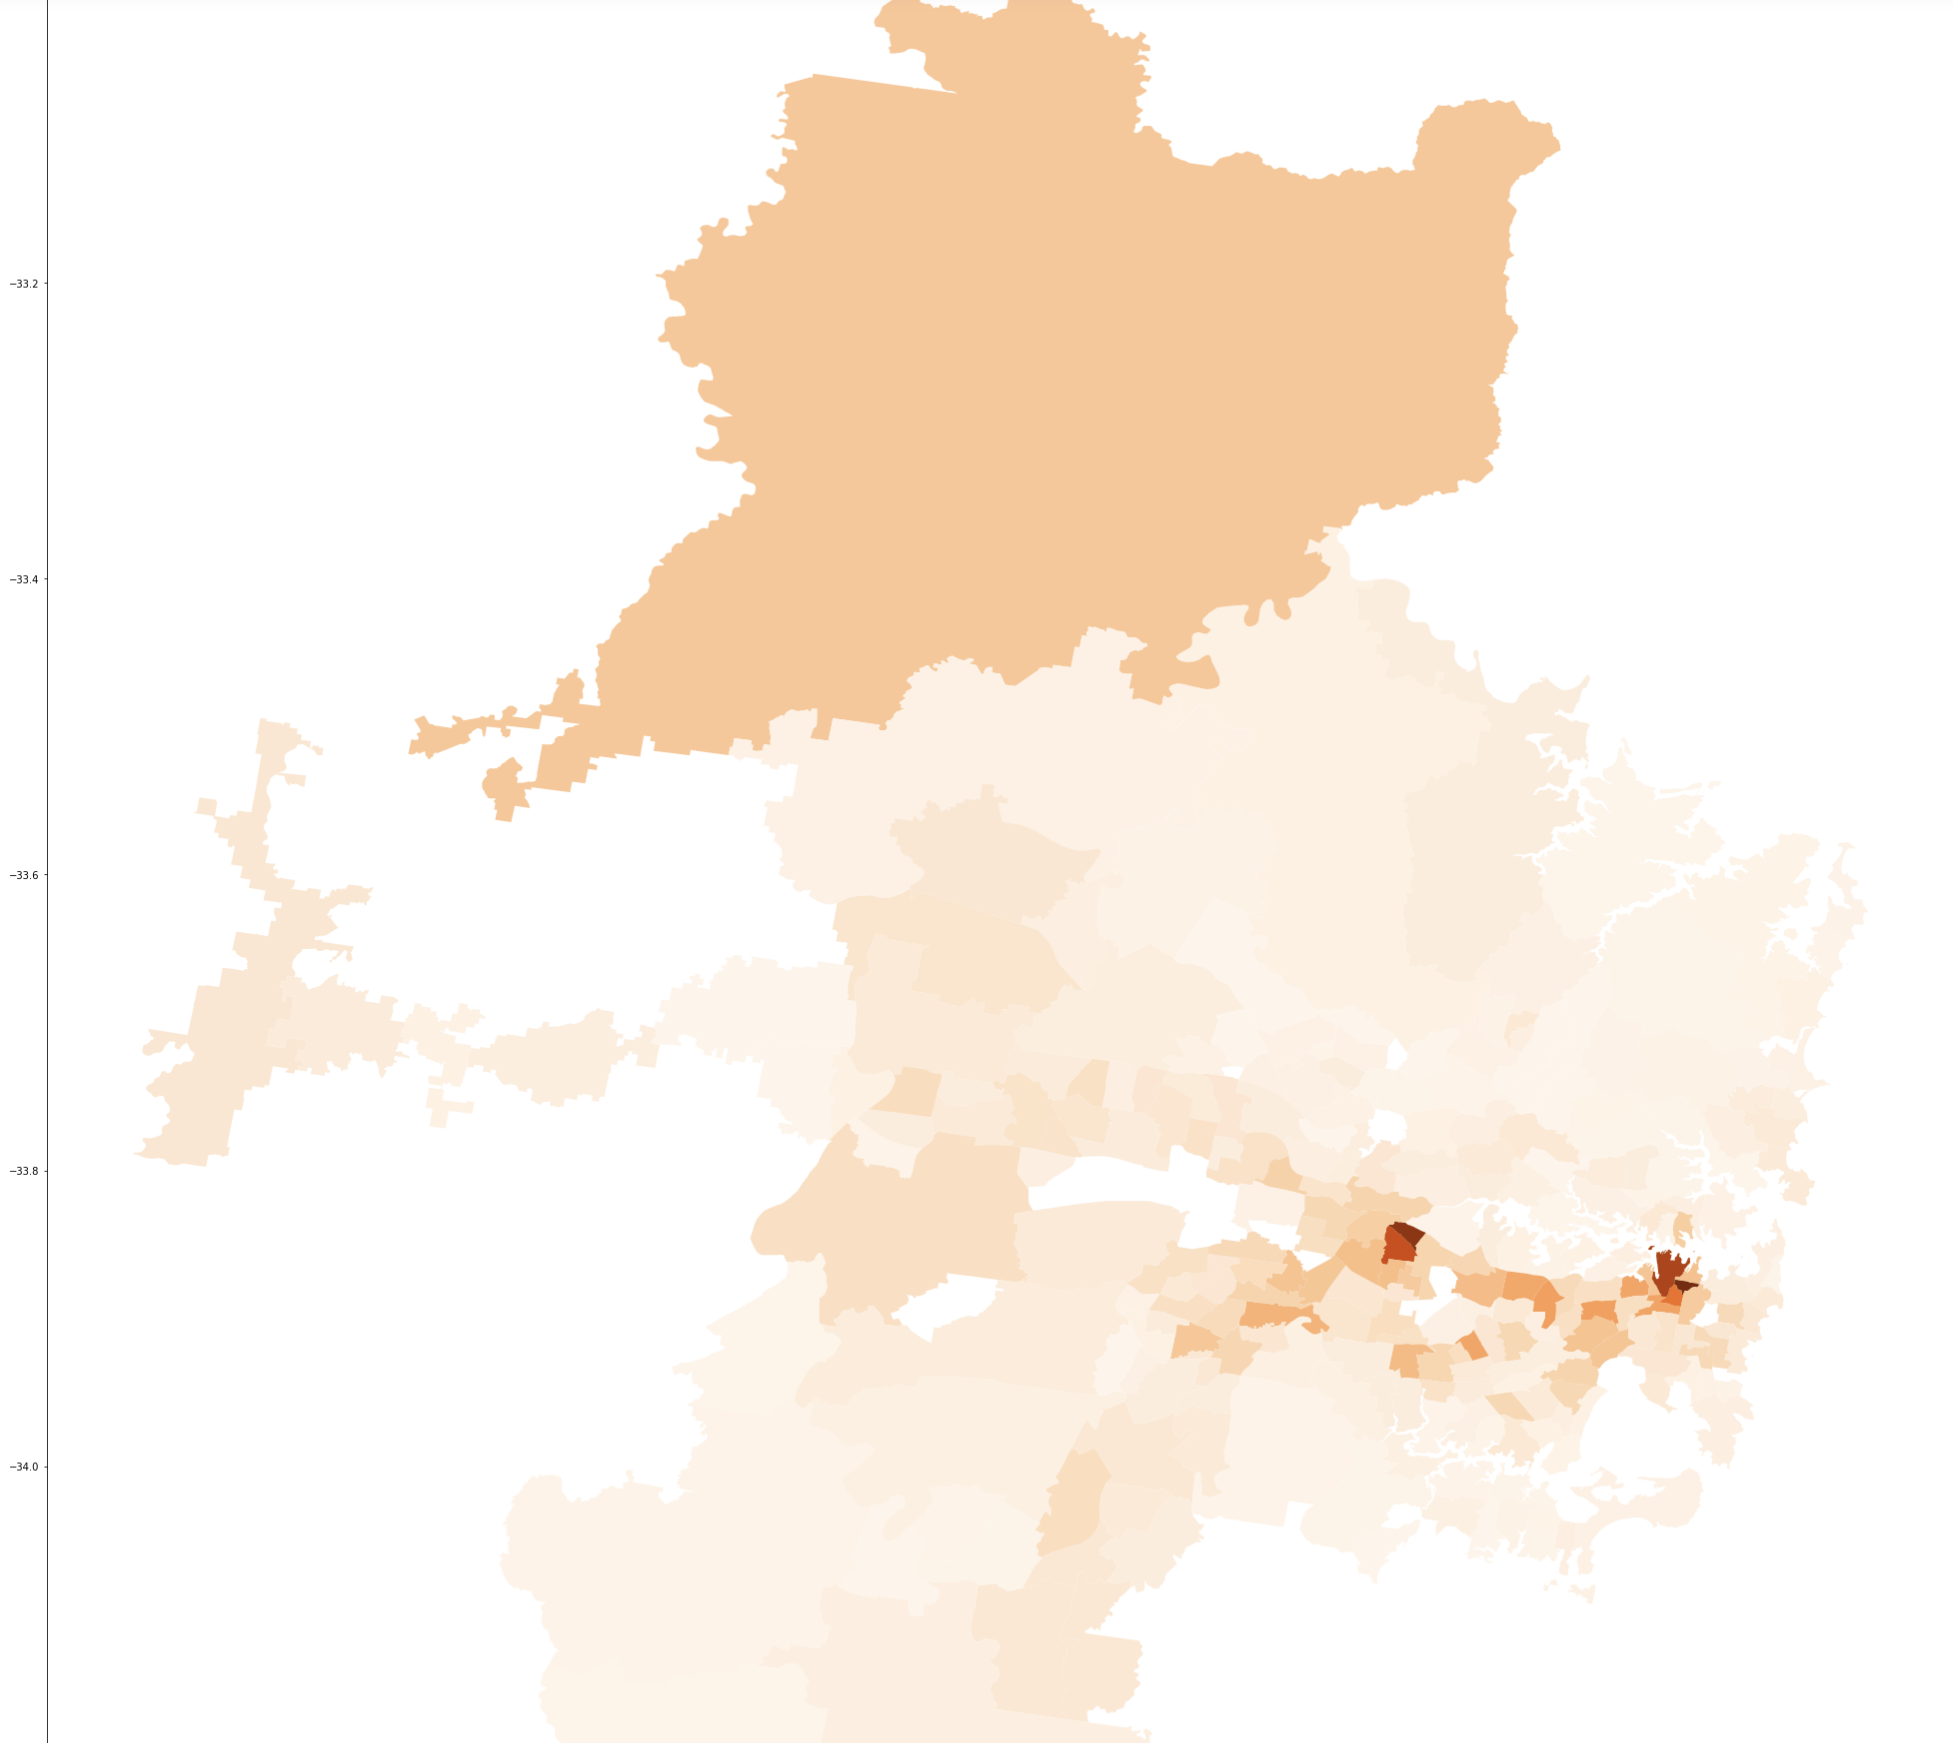

#### Observation
The greater area around Gosford also has higher than average rates of homelessness. However without a more detailed breakdown, hard to know if this is concentrated in the town itself or just the general area. 

### Worst Areas
For rate of homeless per 10,000

1. Darlinghurst, **506.9**
2. Auburn - North, **466**
3. Sydney - Haymarket - The Rocks, **420.5**
4. Auburn - Central, **384.7**
5. Surrey Hills, **307.4**
6. Petersham - Stanmore, **223.9**
7. Ashfield, **223.6**
8. Redfern - Chippendale, **216.5**